* Psych8k Raw Dataset:
* CBT Conversations Raw Dataset:
* Psych8k After Feature Engineering:
* CBT Conversations After Feature Engineering:
* Merged and Preprocessed Dataset: /content/drive/MyDrive/ACADEMICS/FYP/4. Implementation/Datasets/Final Dataset/Psych8k_and_CBT_Conversation_Dataset.json

In [ ]:
# Psych8k Raw Dataset: /content/drive/MyDrive/ACADEMICS/FYP/4. Implementation/Datasets/Psych8k/Psych8k.csv
# Psych8k After Feature Engineering: /content/drive/MyDrive/ACADEMICS/FYP/4. Implementation/Datasets/Psych8k/Preprocessed_Psych8k_with_Cognitive_Distortions.json
# CBT Conversations Raw Dataset: /content/drive/MyDrive/ACADEMICS/FYP/4. Implementation/Datasets/SynthDataset for FTing/cleaned_cbt_therapy_dataset.json
# CBT Conversations After Feature Engineering: /content/drive/MyDrive/ACADEMICS/FYP/4. Implementation/Datasets/SynthDataset for FTing/Preprocessed_CBT_Dataset_Enriched.json
# Final Merged and Preprocessed Dataset: /content/drive/MyDrive/ACADEMICS/FYP/4. Implementation/Datasets/Final Dataset/Psych8k_and_CBT_Conversation_Dataset.json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# # Mental Health Conversation Dataset Analysis for LLM Fine-tuning

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set plotting styles for better visualizations
plt.style.use('fivethirtyeight')
sns.set_palette("deep")
pio.templates.default = "plotly_white"

print("Starting comprehensive analysis of mental health conversation dataset...")

Starting comprehensive analysis of mental health conversation dataset...


In [ ]:
# Step 1: Load and Explore the Dataset
print("\n--- Step 1: Data Loading and Initial Exploration ---")

# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
dataset_path = '/content/drive/MyDrive/ACADEMICS/FYP/4. Implementation/Datasets/Final Dataset/Psych8k_and_CBT_Conversation_Dataset.json'
with open(dataset_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Convert to pandas DataFrame for easier analysis
conversations = []
for item in data:
    conv = {
        'conversation_id': item['conversation_id'],
        'source': item['metadata'].get('source', 'unknown'),
        'turn_count': item['metadata'].get('turn_count', 0),
        'cognitive_distortions': item['metadata'].get('cognitive_distortions', []),
    }

    # Process turns to extract user and therapist content
    user_contents = []
    therapist_contents = []

    for turn in item['turns']:
        if turn['role'].lower() == 'user':
            user_contents.append(turn['content'])
        elif turn['role'].lower() == 'therapist':
            therapist_contents.append(turn['content'])

    conv['user_content'] = ' '.join(user_contents)
    conv['therapist_content'] = ' '.join(therapist_contents)
    conv['user_content_length'] = len(' '.join(user_contents))
    conv['therapist_content_length'] = len(' '.join(therapist_content))
    conv['user_turn_count'] = len(user_contents)
    conv['therapist_turn_count'] = len(therapist_contents)

    conversations.append(conv)

df = pd.DataFrame(conversations)

# Display basic information about the dataset
print(f"Dataset contains {len(df)} conversations")
print("\nFirst 2 rows of the dataset:")
print(df.head(2).to_string())
print("\nDataset columns:", df.columns.tolist())
print("\nDataset summary statistics:")
print(df.describe().T)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


--- Step 1: Data Loading and Initial Exploration ---
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NameError: name 'therapist_content' is not defined

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


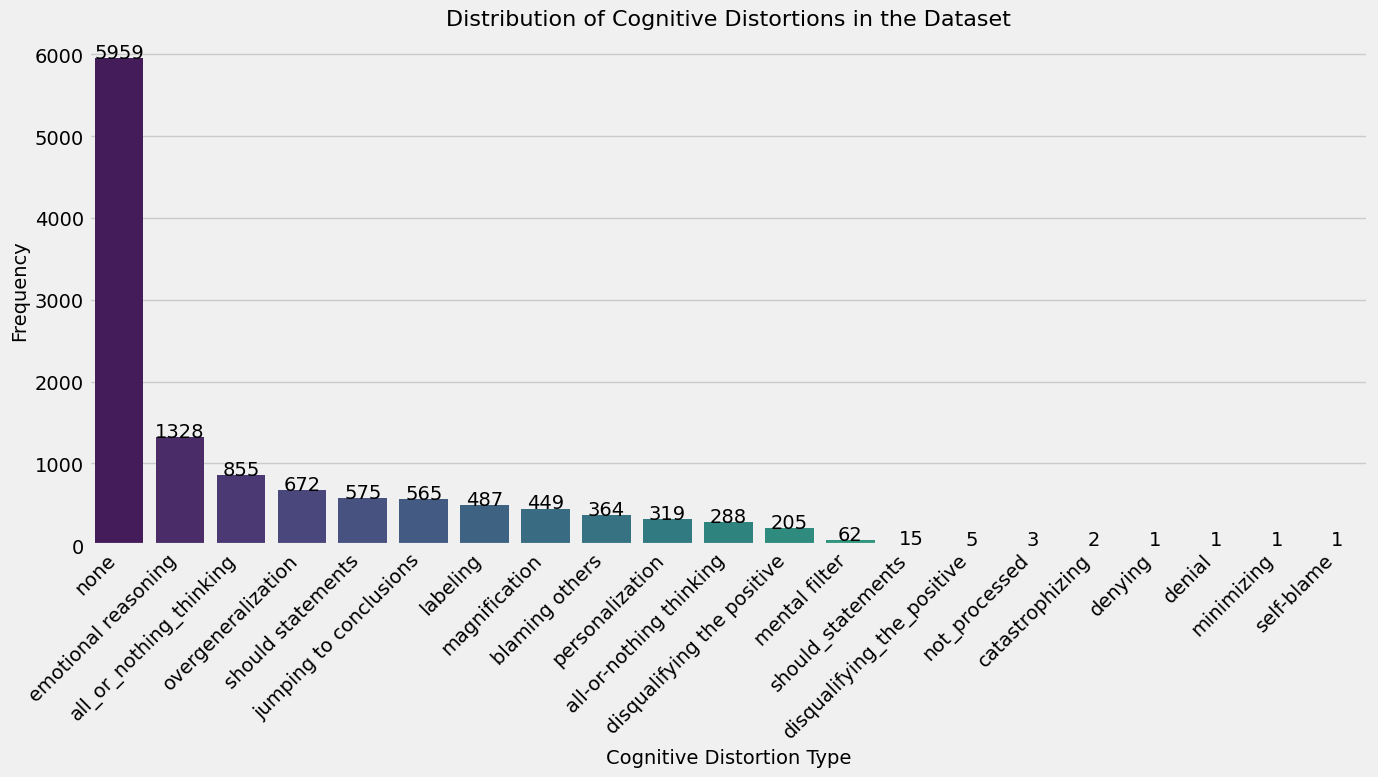

Total conversations: 11186
Conversations with cognitive distortions: 5227 (46.73%)
Total distortions identified: 12157
Average distortions per conversation: 1.09


In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive')

# Path to your dataset
file_path = "/content/drive/MyDrive/ACADEMICS/FYP/4. Implementation/Datasets/Final Dataset/Psych8k_and_CBT_Conversation_Dataset.json"

# Load the dataset
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract cognitive distortions from each conversation
all_distortions = []
for conversation in data:
    # Access the cognitive_distortions list in metadata
    distortions = conversation.get('metadata', {}).get('cognitive_distortions', [])

    # Add the distortions to our list
    # If 'none' is the only distortion, record it
    if not distortions or (len(distortions) == 1 and distortions[0].lower() == 'none'):
        all_distortions.append('none')
    else:
        # Add each non-none distortion separately
        for distortion in distortions:
            if distortion.lower() != 'none':
                all_distortions.append(distortion.lower())

# Count the occurrences of each distortion type
distortion_counts = Counter(all_distortions)

# Convert to DataFrame for easier plotting
df = pd.DataFrame({
    'Distortion': list(distortion_counts.keys()),
    'Count': list(distortion_counts.values())
})

# Sort by count in descending order
df = df.sort_values('Count', ascending=False).reset_index(drop=True)

# Create the plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Distortion', y='Count', data=df, palette='viridis')

# Add data labels on top of bars
for i, v in enumerate(df['Count']):
    ax.text(i, v + 0.5, str(v), ha='center')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Distribution of Cognitive Distortions in the Dataset', fontsize=16)
plt.xlabel('Cognitive Distortion Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

# Print summary statistics
total_conversations = len(data)
conversations_with_distortions = sum(1 for c in data if c.get('metadata', {}).get('cognitive_distortions', []) and
                                   not (len(c.get('metadata', {}).get('cognitive_distortions', [])) == 1 and
                                        c.get('metadata', {}).get('cognitive_distortions', [])[0].lower() == 'none'))

print(f"Total conversations: {total_conversations}")
print(f"Conversations with cognitive distortions: {conversations_with_distortions} ({conversations_with_distortions/total_conversations*100:.2f}%)")
print(f"Total distortions identified: {sum(distortion_counts.values())}")
print(f"Average distortions per conversation: {sum(distortion_counts.values())/total_conversations:.2f}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


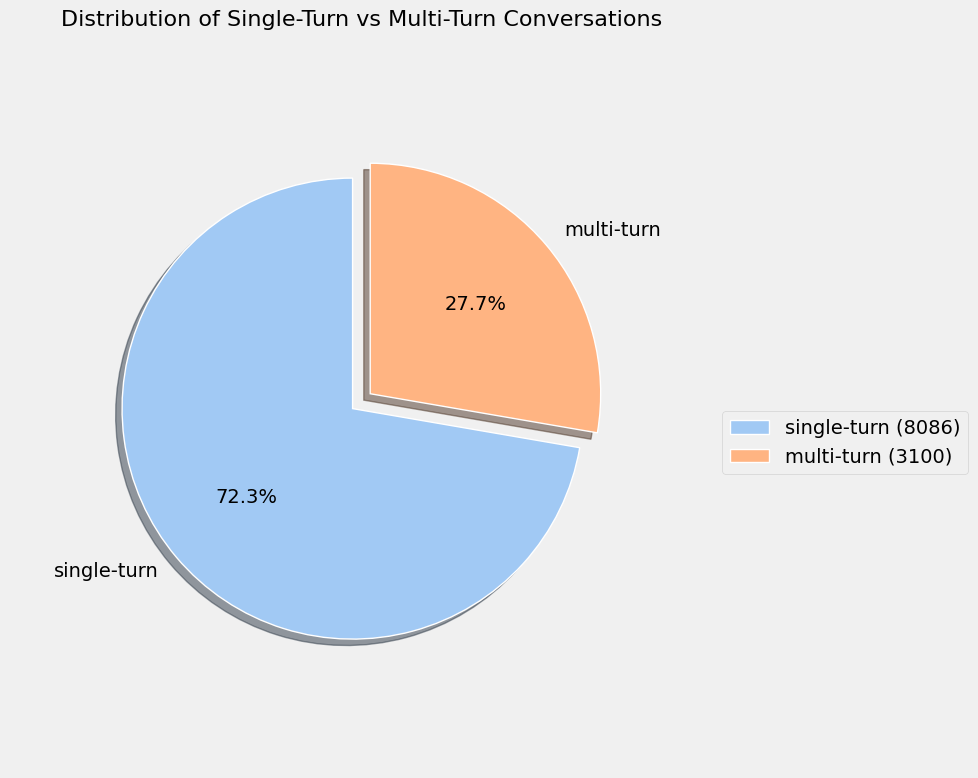

Total conversations: 11186
single-turn: 8086 (72.3%)
multi-turn: 3100 (27.7%)


In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive')

# Path to your dataset (using the same path from previous example)
file_path = "/content/drive/MyDrive/ACADEMICS/FYP/4. Implementation/Datasets/Final Dataset/Psych8k_and_CBT_Conversation_Dataset.json"

# Load the dataset
with open(file_path, 'r') as file:
    data = json.load(file)

# Count single-turn and multi-turn conversations
conversation_types = {'single-turn': 0, 'multi-turn': 0}

for conversation in data:
    # Get the type from metadata
    conv_type = conversation.get('metadata', {}).get('type', '')
    if conv_type in conversation_types:
        conversation_types[conv_type] += 1
    else:
        # Handle any other types if they exist
        conversation_types[conv_type] = conversation_types.get(conv_type, 0) + 1

# Create a DataFrame for plotting
df = pd.DataFrame({
    'Type': list(conversation_types.keys()),
    'Count': list(conversation_types.values())
})

# Calculate percentages for labels
total = df['Count'].sum()
df['Percentage'] = df['Count'] / total * 100

# Create the pie chart
plt.figure(figsize=(10, 8))

# Define custom colors
colors = sns.color_palette('pastel')[0:len(df)]

# Plot the pie chart with percentages
plt.pie(df['Count'],
        labels=df['Type'],
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        shadow=True,
        explode=[0.05] * len(df),  # Slightly explode all segments
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Add a title
plt.title('Distribution of Single-Turn vs Multi-Turn Conversations', fontsize=16)

# Ensure the pie is drawn as a circle
plt.axis('equal')

# Add a legend with count information
legend_labels = [f"{row['Type']} ({row['Count']})" for _, row in df.iterrows()]
plt.legend(legend_labels, loc='best', bbox_to_anchor=(1, 0.5))

# Display the chart
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Total conversations: {total}")
for index, row in df.iterrows():
    print(f"{row['Type']}: {row['Count']} ({row['Percentage']:.1f}%)")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


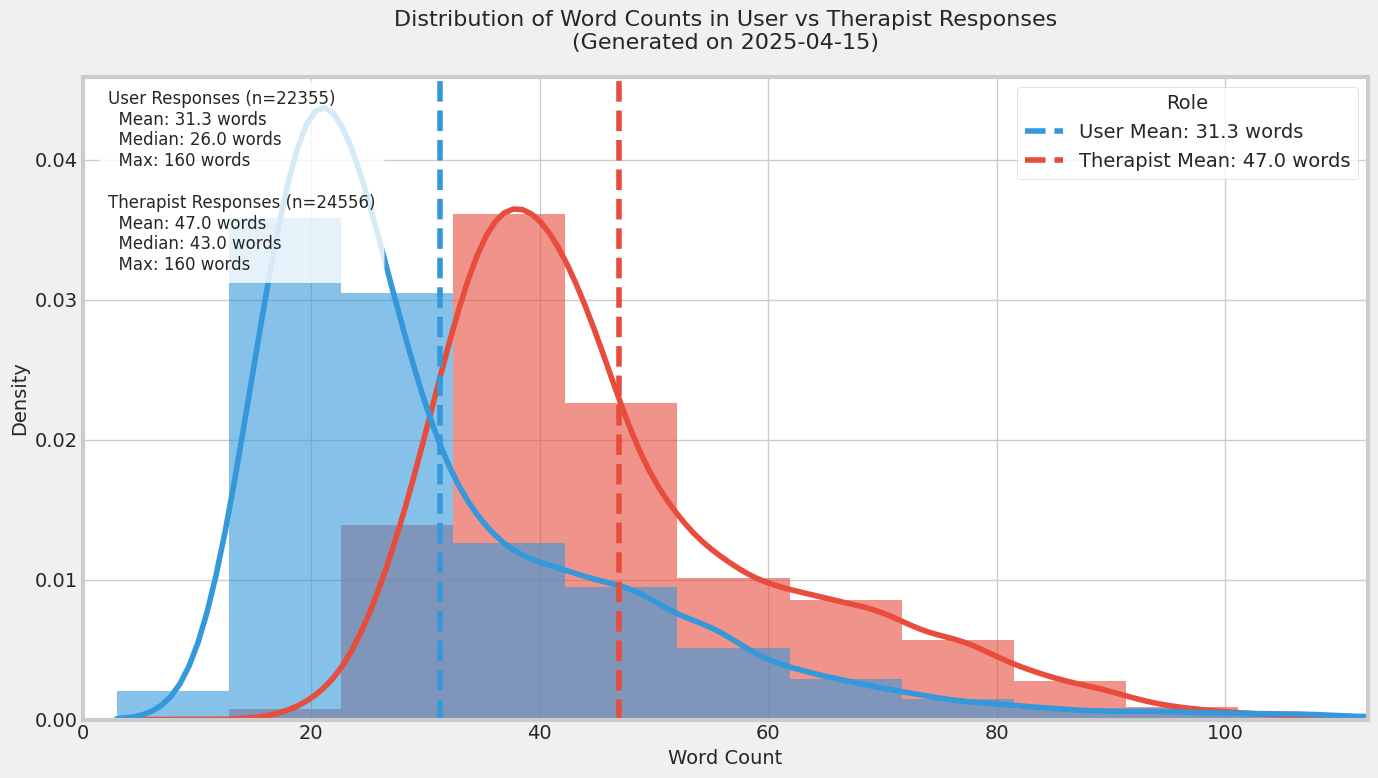

Summary Statistics:

User Responses:
count    22355.000000
mean        31.288437
std         16.996737
min          3.000000
25%         20.000000
50%         26.000000
75%         38.000000
max        160.000000
Name: Word Count, dtype: float64

Therapist Responses:
count    24556.000000
mean        46.958788
std         16.035552
min          7.000000
25%         36.000000
50%         43.000000
75%         55.000000
max        160.000000
Name: Word Count, dtype: float64

Mann-Whitney U test: p-value = 0.000000
The difference in word counts between users and therapists is statistically significant.


In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive')

# Path to your dataset
file_path = "/content/drive/MyDrive/ACADEMICS/FYP/4. Implementation/Datasets/Final Dataset/Psych8k_and_CBT_Conversation_Dataset.json"

# Load the dataset
with open(file_path, 'r') as file:
    data = json.load(file)

# Function to count words in a text
def count_words(text):
    return len(text.split())

# Initialize lists to store word counts
user_word_counts = []
therapist_word_counts = []

# Extract word counts from conversations
for conversation in data:
    turns = conversation.get('turns', [])
    for turn in turns:
        role = turn.get('role', '').lower()
        content = turn.get('content', '')

        if role in ['user', 'patient']:
            user_word_counts.append(count_words(content))
        elif role == 'therapist':
            therapist_word_counts.append(count_words(content))

# Create a DataFrame for easier analysis
df = pd.DataFrame({
    'Role': ['User'] * len(user_word_counts) + ['Therapist'] * len(therapist_word_counts),
    'Word Count': user_word_counts + therapist_word_counts
})

# Calculate summary statistics
user_stats = df[df['Role'] == 'User']['Word Count'].describe()
therapist_stats = df[df['Role'] == 'Therapist']['Word Count'].describe()

# Set up the figure and style
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Create histograms with KDE (Kernel Density Estimate) curves
sns.histplot(data=df, x='Word Count', hue='Role', element='step',
             stat='density', common_norm=False, kde=True,
             palette=['#3498db', '#e74c3c'], alpha=0.6,
             binwidth=10, linewidth=0)

# Adjust x-axis to focus on main distribution (exclude extreme outliers)
# Calculate a reasonable upper limit (e.g., 95th percentile + 50% margin)
upper_limit = df['Word Count'].quantile(0.95) * 1.5
plt.xlim(0, upper_limit)

# Add vertical lines for averages
plt.axvline(x=user_stats['mean'], color='#3498db', linestyle='--',
            label=f'User Mean: {user_stats["mean"]:.1f} words')
plt.axvline(x=therapist_stats['mean'], color='#e74c3c', linestyle='--',
            label=f'Therapist Mean: {therapist_stats["mean"]:.1f} words')

# Add title and labels with current date
current_date = "2025-04-15"  # Using the provided date
plt.title(f'Distribution of Word Counts in User vs Therapist Responses\n(Generated on {current_date})',
          fontsize=16, pad=20)
plt.xlabel('Word Count', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add annotation with statistics
stats_text = (f"User Responses (n={len(user_word_counts)})\n"
              f"  Mean: {user_stats['mean']:.1f} words\n"
              f"  Median: {user_stats['50%']:.1f} words\n"
              f"  Max: {user_stats['max']:.0f} words\n\n"
              f"Therapist Responses (n={len(therapist_word_counts)})\n"
              f"  Mean: {therapist_stats['mean']:.1f} words\n"
              f"  Median: {therapist_stats['50%']:.1f} words\n"
              f"  Max: {therapist_stats['max']:.0f} words")

plt.annotate(stats_text, xy=(0.02, 0.98), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8),
             va='top', fontsize=12)

# Enhance the legend
plt.legend(title='Role', loc='upper right', frameon=True)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

# Print additional statistics
print("Summary Statistics:")
print("\nUser Responses:")
print(user_stats)
print("\nTherapist Responses:")
print(therapist_stats)

# Mann-Whitney U test to check if the difference is statistically significant
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(user_word_counts, therapist_word_counts)
print(f"\nMann-Whitney U test: p-value = {p:.6f}")
if p < 0.05:
    print("The difference in word counts between users and therapists is statistically significant.")
else:
    print("There is no statistically significant difference in word counts.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading dataset...
Loaded 11186 conversations
Analyzing sentiment scores...
Processing conversation 0/11186
Processing conversation 50/11186
Processing conversation 100/11186
Processing conversation 150/11186
Processing conversation 200/11186
Processing conversation 250/11186
Processing conversation 300/11186
Processing conversation 350/11186
Processing conversation 400/11186
Processing conversation 450/11186
Processing conversation 500/11186
Processing conversation 550/11186
Processing conversation 600/11186
Processing conversation 650/11186
Processing conversation 700/11186
Processing conversation 750/11186
Processing conversation 800/11186
Processing conversation 850/11186
Processing conversation 900/11186
Processing conversation 950/11186
Processing conversation 1000/11186
Processing conversation 1050/11186
Processing conversation 1100/11186
Processing co

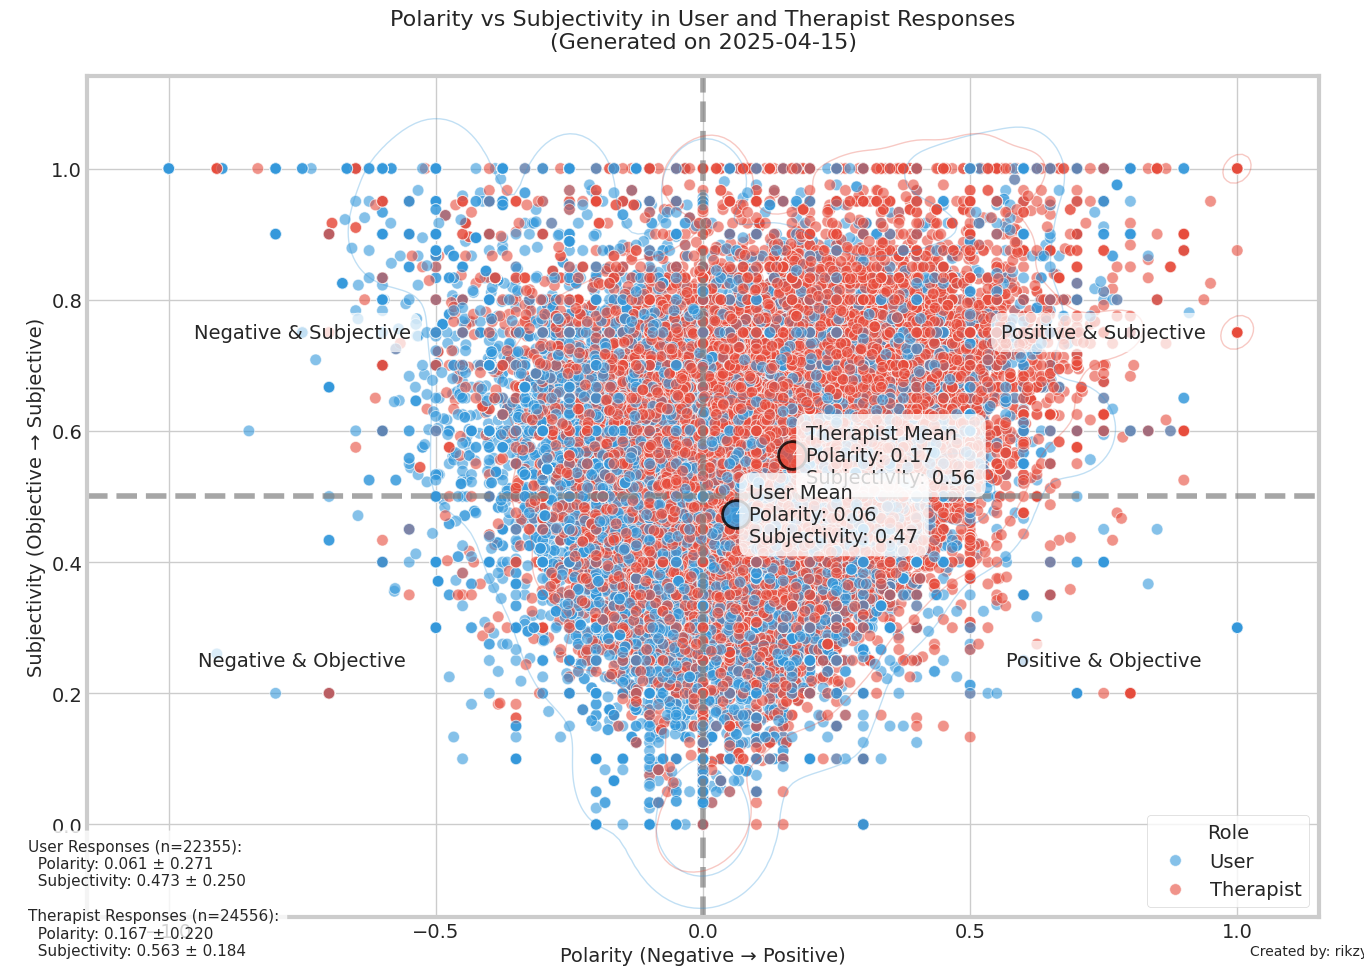

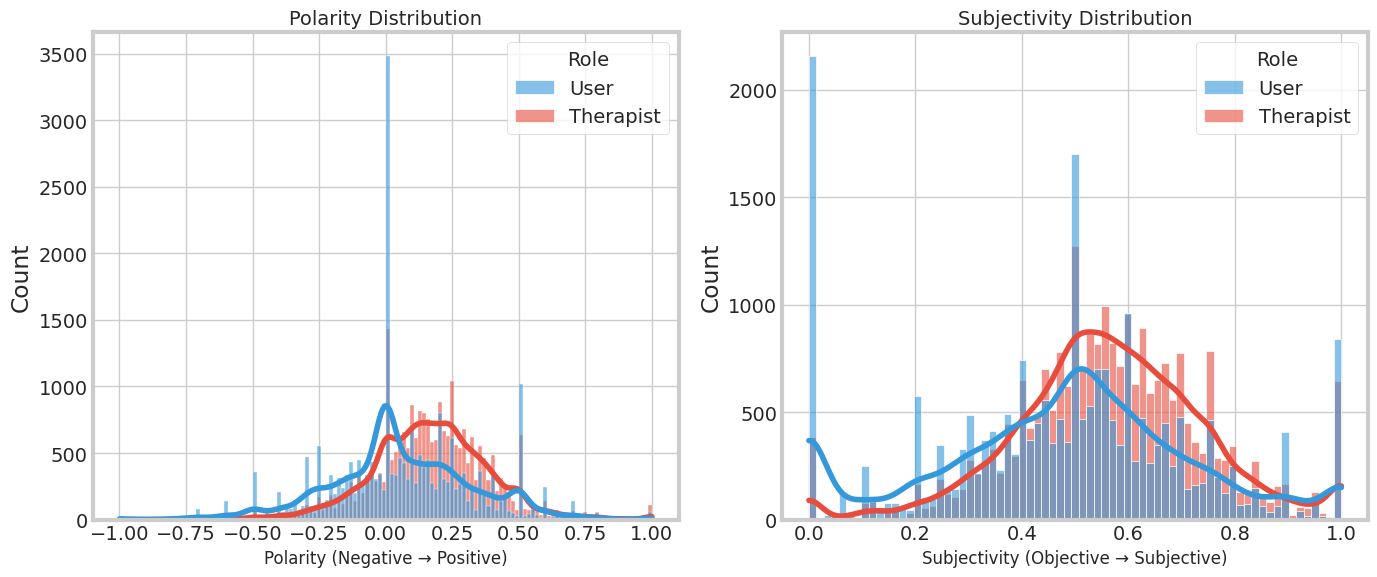


Summary Statistics:

User Responses:
           Polarity  Subjectivity
count  22355.000000  22355.000000
mean       0.060877      0.472724
std        0.270739      0.249554
min       -1.000000      0.000000
25%       -0.093956      0.330456
50%        0.022222      0.500000
75%        0.225000      0.622222
max        1.000000      1.000000

Therapist Responses:
           Polarity  Subjectivity
count  24556.000000  24556.000000
mean       0.167470      0.562814
std        0.220026      0.184370
min       -1.000000      0.000000
25%        0.027778      0.458333
50%        0.166667      0.562500
75%        0.300000      0.675643
max        1.000000      1.000000

Statistical Comparison:
Polarity t-test: p-value = 0.000000
Subjectivity t-test: p-value = 0.000000
User - Correlation between Polarity and Subjectivity: 0.0322
Therapist - Correlation between Polarity and Subjectivity: 0.2215


In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import numpy as np

# Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive')

# Path to your dataset
file_path = "/content/drive/MyDrive/ACADEMICS/FYP/4. Implementation/Datasets/Final Dataset/Psych8k_and_CBT_Conversation_Dataset.json"

# Load the dataset
print("Loading dataset...")
with open(file_path, 'r') as file:
    data = json.load(file)
print(f"Loaded {len(data)} conversations")

# Function to analyze sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return {
        'polarity': analysis.sentiment.polarity,  # -1 to 1 (negative to positive)
        'subjectivity': analysis.sentiment.subjectivity  # 0 to 1 (objective to subjective)
    }

# Initialize lists to store sentiment scores
print("Analyzing sentiment scores...")
sentiment_data = []

# Process each conversation
for i, conversation in enumerate(data):
    if i % 50 == 0:  # Progress indicator
        print(f"Processing conversation {i}/{len(data)}")

    turns = conversation.get('turns', [])
    for turn in turns:
        role = turn.get('role', '').lower()
        content = turn.get('content', '')

        if role in ['user', 'patient', 'therapist']:
            # Get sentiment scores
            sentiment = get_sentiment(content)

            # Add to our data list
            sentiment_data.append({
                'Role': 'User' if role in ['user', 'patient'] else 'Therapist',
                'Polarity': sentiment['polarity'],
                'Subjectivity': sentiment['subjectivity'],
                'Word Count': len(content.split())
            })

# Create DataFrame
print("Creating DataFrame...")
df = pd.DataFrame(sentiment_data)

# Calculate summary statistics
print("Calculating statistics...")
user_stats = df[df['Role'] == 'User'].describe()
therapist_stats = df[df['Role'] == 'Therapist'].describe()

# Fix: Create the scatter plot with proper markers
print("Generating scatter plot...")
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

# Define colors and markers (both filled markers to avoid the error)
colors = {'User': '#3498db', 'Therapist': '#e74c3c'}

# Create a simpler scatter plot first (avoid mixing marker types)
scatter = sns.scatterplot(
    data=df,
    x='Polarity',
    y='Subjectivity',
    hue='Role',
    palette=colors,
    alpha=0.6,
    s=70  # Marker size
)

# Add title and labels
current_date = "2025-04-15"
plt.title(f'Polarity vs Subjectivity in User and Therapist Responses\n(Generated on {current_date})',
          fontsize=16, pad=20)
plt.xlabel('Polarity (Negative → Positive)', fontsize=14)
plt.ylabel('Subjectivity (Objective → Subjective)', fontsize=14)

# Draw quadrant lines
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.7)
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7)

# Add quadrant labels
plt.text(-0.75, 0.25, "Negative & Objective", ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.7))
plt.text(0.75, 0.25, "Positive & Objective", ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.7))
plt.text(-0.75, 0.75, "Negative & Subjective", ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.7))
plt.text(0.75, 0.75, "Positive & Subjective", ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.7))

# Add mean points for each group
for role, group_data in df.groupby('Role'):
    mean_x = group_data['Polarity'].mean()
    mean_y = group_data['Subjectivity'].mean()
    plt.plot(mean_x, mean_y, 'o', ms=20, mec='black', mew=2,
             alpha=0.8, color=colors[role])

    # Add text label for the mean point
    plt.annotate(
        f"{role} Mean\nPolarity: {mean_x:.2f}\nSubjectivity: {mean_y:.2f}",
        xy=(mean_x, mean_y),
        xytext=(10, -20),
        textcoords='offset points',
        bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.3')
    )

# Add density contours to show concentration of points
for role, color in colors.items():
    subset = df[df['Role'] == role]
    if len(subset) > 10:  # Need enough points for density estimation
        try:
            sns.kdeplot(
                x=subset['Polarity'],
                y=subset['Subjectivity'],
                levels=3,
                color=color,
                alpha=0.3,
                linewidths=1
            )
        except Exception as e:
            print(f"Could not create density contour for {role}: {e}")

# Add annotation with statistics
stats_text = (
    f"User Responses (n={df[df['Role'] == 'User'].shape[0]}):\n"
    f"  Polarity: {df[df['Role'] == 'User']['Polarity'].mean():.3f} ± {df[df['Role'] == 'User']['Polarity'].std():.3f}\n"
    f"  Subjectivity: {df[df['Role'] == 'User']['Subjectivity'].mean():.3f} ± {df[df['Role'] == 'User']['Subjectivity'].std():.3f}\n\n"
    f"Therapist Responses (n={df[df['Role'] == 'Therapist'].shape[0]}):\n"
    f"  Polarity: {df[df['Role'] == 'Therapist']['Polarity'].mean():.3f} ± {df[df['Role'] == 'Therapist']['Polarity'].std():.3f}\n"
    f"  Subjectivity: {df[df['Role'] == 'Therapist']['Subjectivity'].mean():.3f} ± {df[df['Role'] == 'Therapist']['Subjectivity'].std():.3f}"
)

plt.annotate(stats_text, xy=(0.02, 0.02), xycoords='figure fraction',
             bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8),
             va='bottom', fontsize=11)

# Add username of the creator
plt.annotate("Created by: rikzyj", xy=(0.98, 0.02), xycoords='figure fraction',
             bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.8),
             va='bottom', ha='right', fontsize=10)

# Improve the layout
plt.tight_layout()

# Save the figure
plt.savefig("sentiment_analysis_scatter.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

# Create additional histograms for marginal distributions
plt.figure(figsize=(14, 6))

# Polarity distribution by role
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Polarity', hue='Role', palette=colors, kde=True, alpha=0.6)
plt.title('Polarity Distribution', fontsize=14)
plt.xlabel('Polarity (Negative → Positive)', fontsize=12)

# Subjectivity distribution by role
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Subjectivity', hue='Role', palette=colors, kde=True, alpha=0.6)
plt.title('Subjectivity Distribution', fontsize=14)
plt.xlabel('Subjectivity (Objective → Subjective)', fontsize=12)

plt.tight_layout()
plt.savefig("sentiment_distributions.png", dpi=300)
plt.show()

# Print additional statistics
print("\nSummary Statistics:")
print("\nUser Responses:")
print(df[df['Role'] == 'User'][['Polarity', 'Subjectivity']].describe())
print("\nTherapist Responses:")
print(df[df['Role'] == 'Therapist'][['Polarity', 'Subjectivity']].describe())

# Statistical tests
print("\nStatistical Comparison:")
from scipy.stats import ttest_ind

# For Polarity
t_stat, p_val = ttest_ind(
    df[df['Role'] == 'User']['Polarity'],
    df[df['Role'] == 'Therapist']['Polarity'],
    equal_var=False  # Using Welch's t-test to not assume equal variances
)
print(f"Polarity t-test: p-value = {p_val:.6f}")

# For Subjectivity
t_stat, p_val = ttest_ind(
    df[df['Role'] == 'User']['Subjectivity'],
    df[df['Role'] == 'Therapist']['Subjectivity'],
    equal_var=False
)
print(f"Subjectivity t-test: p-value = {p_val:.6f}")

# Check for correlation between polarity and subjectivity
for role in ['User', 'Therapist']:
    corr = df[df['Role'] == role][['Polarity', 'Subjectivity']].corr().iloc[0, 1]
    print(f"{role} - Correlation between Polarity and Subjectivity: {corr:.4f}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading dataset...
Loaded 11186 conversations
Extracting cognitive distortions...


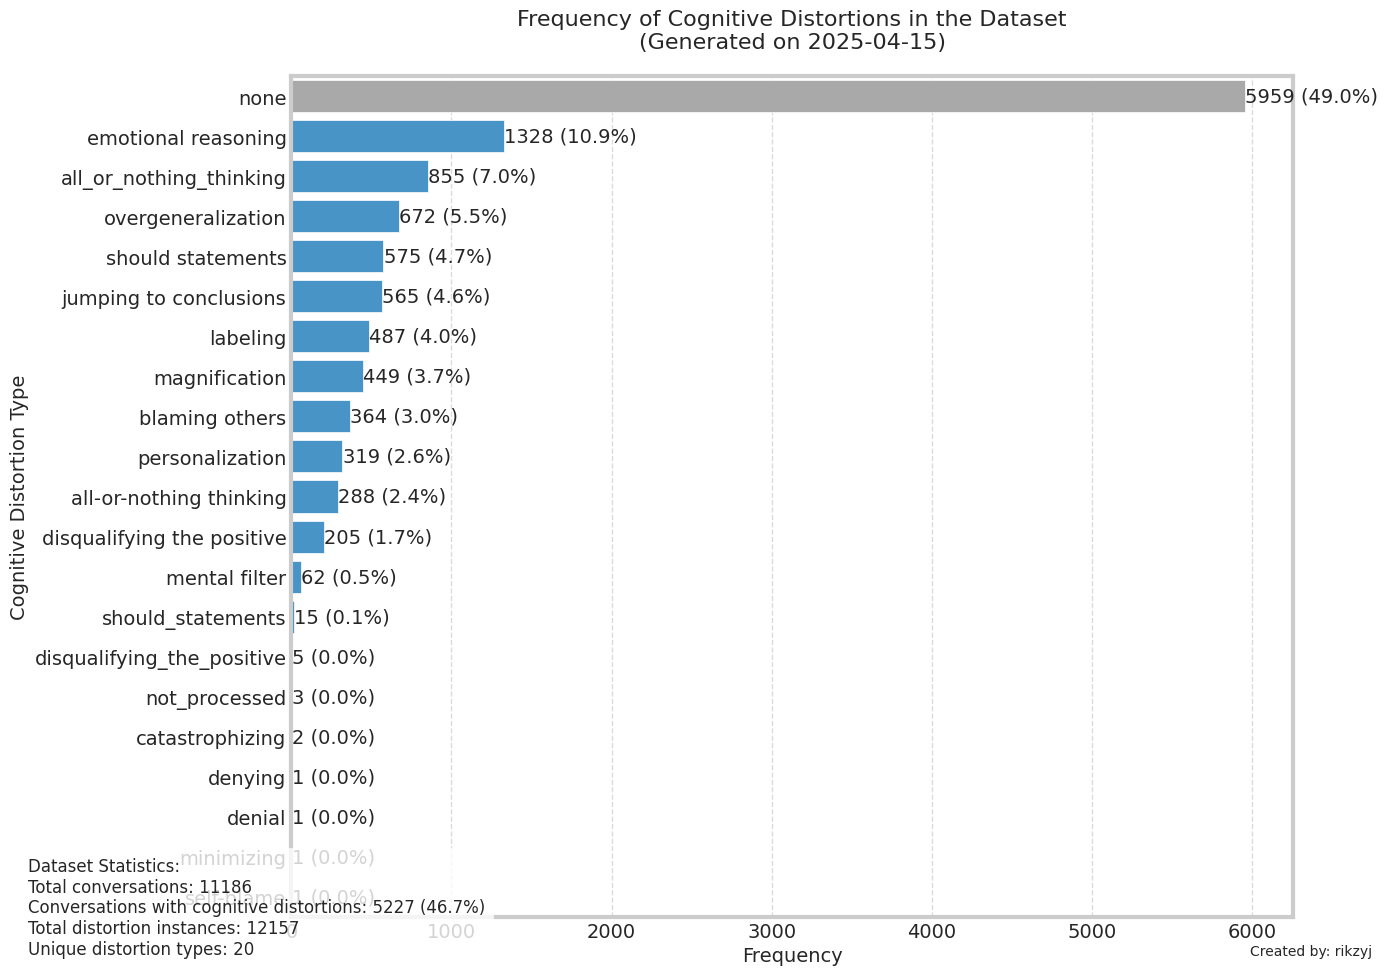


Distribution Analysis:

Source: psych8k
  none: 4043 (45.4%)
  emotional reasoning: 1328 (14.9%)
  should statements: 575 (6.5%)
  jumping to conclusions: 565 (6.3%)
  labeling: 485 (5.4%)
  magnification: 449 (5.0%)
  blaming others: 364 (4.1%)
  personalization: 319 (3.6%)
  all-or-nothing thinking: 288 (3.2%)
  overgeneralization: 211 (2.4%)
  disqualifying the positive: 205 (2.3%)
  mental filter: 62 (0.7%)
  not_processed: 3 (0.0%)
  catastrophizing: 2 (0.0%)
  denying: 1 (0.0%)
  minimizing: 1 (0.0%)
  self-blame: 1 (0.0%)
  denial: 1 (0.0%)

Source: cbt
  none: 1916 (58.9%)
  all_or_nothing_thinking: 855 (26.3%)
  overgeneralization: 461 (14.2%)
  should_statements: 15 (0.5%)
  disqualifying_the_positive: 5 (0.2%)
  labeling: 2 (0.1%)

Co-occurrence Analysis:

Top Cognitive Distortion Co-occurrences:
  all_or_nothing_thinking + overgeneralization: 138
  emotional reasoning + magnification: 101
  emotional reasoning + jumping to conclusions: 91
  emotional reasoning + labeling: 

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive')

# Path to your dataset
file_path = "/content/drive/MyDrive/ACADEMICS/FYP/4. Implementation/Datasets/Final Dataset/Psych8k_and_CBT_Conversation_Dataset.json"

# Load the dataset
print("Loading dataset...")
with open(file_path, 'r') as file:
    data = json.load(file)
print(f"Loaded {len(data)} conversations")

# Extract cognitive distortions from each conversation
print("Extracting cognitive distortions...")
all_distortions = []

# Process each conversation
for conversation in data:
    # Access the cognitive_distortions list in metadata
    distortions = conversation.get('metadata', {}).get('cognitive_distortions', [])

    # Process distortions
    if not distortions:
        all_distortions.append('none')
    else:
        for distortion in distortions:
            # Normalize distortion names (lowercase)
            distortion_name = distortion.lower()
            if distortion_name == 'none' and len(distortions) > 1:
                # Skip 'none' if there are other distortions listed
                continue
            all_distortions.append(distortion_name)

# Count the occurrences of each distortion type
distortion_counts = Counter(all_distortions)

# Convert to DataFrame for easier plotting
df = pd.DataFrame({
    'Cognitive Distortion': list(distortion_counts.keys()),
    'Frequency': list(distortion_counts.values())
})

# Sort by frequency in descending order
df = df.sort_values('Frequency', ascending=False).reset_index(drop=True)

# Create a custom color palette (blues for actual distortions, gray for 'none')
colors = []
for distortion in df['Cognitive Distortion']:
    if distortion.lower() == 'none':
        colors.append('#A9A9A9')  # Gray for 'none'
    else:
        colors.append('#3498db')  # Blue for actual distortions

# Create the plot with a consistent style
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

# Create the bar chart
ax = sns.barplot(
    x='Frequency',
    y='Cognitive Distortion',
    data=df,
    palette=colors,
    orient='h'  # Horizontal bars for better readability of distortion names
)

# Add data labels on the bars
for i, v in enumerate(df['Frequency']):
    percentage = 100 * v / sum(distortion_counts.values())
    ax.text(
        v + 0.5,                   # Position (slightly right of bar end)
        i,                         # Y position (bar index)
        f"{v} ({percentage:.1f}%)", # Text (count and percentage)
        va='center'                # Vertical alignment
    )

# Add a title with current date
current_date = "2025-04-15"
current_user = "rikzyj"
plt.title(
    f'Frequency of Cognitive Distortions in the Dataset\n(Generated on {current_date})',
    fontsize=16,
    pad=20
)

# Add axis labels
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Cognitive Distortion Type', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Calculate and display statistics
total_distortions = sum(distortion_counts.values())
total_conversations = len(data)
conversations_with_distortions = total_conversations - (distortion_counts.get('none', 0))

stats_text = (
    f"Dataset Statistics:\n"
    f"Total conversations: {total_conversations}\n"
    f"Conversations with cognitive distortions: {conversations_with_distortions} ({100*conversations_with_distortions/total_conversations:.1f}%)\n"
    f"Total distortion instances: {total_distortions}\n"
    f"Unique distortion types: {len(distortion_counts) - (1 if 'none' in distortion_counts else 0)}"
)

plt.annotate(
    stats_text,
    xy=(0.02, 0.02),
    xycoords='figure fraction',
    bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8),
    va='bottom',
    fontsize=12
)

# Add creator's username
plt.annotate(
    f"Created by: {current_user}",
    xy=(0.98, 0.02),
    xycoords='figure fraction',
    bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.8),
    va='bottom',
    ha='right',
    fontsize=10
)

# Improve layout
plt.tight_layout()

# Save the figure
plt.savefig("cognitive_distortions_frequency.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

# Additional analysis - print statistics by source
print("\nDistribution Analysis:")

# Count by source
source_distortion_counts = {}
for conversation in data:
    source = conversation.get('metadata', {}).get('source', 'unknown')
    distortions = conversation.get('metadata', {}).get('cognitive_distortions', [])

    if source not in source_distortion_counts:
        source_distortion_counts[source] = Counter()

    if not distortions:
        source_distortion_counts[source]['none'] += 1
    else:
        has_distortion = False
        for distortion in distortions:
            if distortion.lower() != 'none':
                source_distortion_counts[source][distortion.lower()] += 1
                has_distortion = True

        if not has_distortion:
            source_distortion_counts[source]['none'] += 1

# Print statistics by source
for source, counts in source_distortion_counts.items():
    print(f"\nSource: {source}")
    total = sum(counts.values())
    for distortion, count in counts.most_common():
        print(f"  {distortion}: {count} ({100*count/total:.1f}%)")

# Calculate co-occurrence matrix for distortions
print("\nCo-occurrence Analysis:")
distortion_types = [d for d in set(all_distortions) if d.lower() != 'none']
co_occurrence = {d1: {d2: 0 for d2 in distortion_types} for d1 in distortion_types}

for conversation in data:
    distortions = [d.lower() for d in conversation.get('metadata', {}).get('cognitive_distortions', [])
                  if d.lower() != 'none']

    # Count co-occurrences
    for i, d1 in enumerate(distortions):
        for d2 in distortions[i:]:
            if d1 in co_occurrence and d2 in co_occurrence[d1]:
                co_occurrence[d1][d2] += 1
            if d2 in co_occurrence and d1 in co_occurrence[d2] and d1 != d2:
                co_occurrence[d2][d1] += 1

# Find top co-occurrences
co_occurrences = []
for d1 in distortion_types:
    for d2 in distortion_types:
        if d1 < d2:  # To avoid counting pairs twice
            co_occurrences.append((d1, d2, co_occurrence[d1][d2]))

# Sort by count and print top co-occurrences
co_occurrences.sort(key=lambda x: x[2], reverse=True)
print("\nTop Cognitive Distortion Co-occurrences:")
for d1, d2, count in co_occurrences[:10]:  # Top 10 co-occurrences
    if count > 0:
        print(f"  {d1} + {d2}: {count}")

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import numpy as np
from collections import Counter
from PIL import Image
from datetime import datetime

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive')

# Path to your dataset
file_path = "/content/drive/MyDrive/ACADEMICS/FYP/4. Implementation/Datasets/Final Dataset/Psych8k_and_CBT_Conversation_Dataset.json"

# Load the dataset
print("Loading dataset...")
with open(file_path, 'r') as file:
    data = json.load(file)
print(f"Loaded {len(data)} conversations")

# Filter single-turn conversations
print("Filtering single-turn conversations...")
single_turn_conversations = [conv for conv in data
                            if conv.get('metadata', {}).get('type', '') == 'single-turn']
print(f"Found {len(single_turn_conversations)} single-turn conversations")

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove special characters and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    custom_stopwords = {'like', 'just', 'im', 'dont', 'feel', 'get', 'also', 'really',
                      'know', 'would', 'could', 'one', 'thing', 'time', 'make', 'think',
                      'something', 'way', 'lot', 'much', 'need', 'even', 'going', 'see',
                      'want', 'still', 'thats', 'ive', 'cant', 'im', 'got', 'didnt'}
    stop_words = stop_words.union(custom_stopwords)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Extract and preprocess text from single-turn conversations
print("Preprocessing conversation text...")
all_text_user = []
all_text_therapist = []
all_text_combined = []

for conv in single_turn_conversations:
    turns = conv.get('turns', [])
    for turn in turns:
        role = turn.get('role', '').lower()
        content = turn.get('content', '')

        # Preprocess the text
        processed_text = preprocess_text(content)

        # Add to appropriate lists
        if role in ['user', 'patient']:
            all_text_user.append(processed_text)
        elif role == 'therapist':
            all_text_therapist.append(processed_text)

        all_text_combined.append(processed_text)

# Combine all texts
user_text = ' '.join(all_text_user)
therapist_text = ' '.join(all_text_therapist)
combined_text = ' '.join(all_text_combined)

# Function to generate and save word cloud
def generate_wordcloud(text, title, filename):
    # Create a mask shape for the word cloud (circle)
    x, y = np.ogrid[:500, :500]
    mask = (x - 250) ** 2 + (y - 250) ** 2 > 250 ** 2
    mask = 255 * mask.astype(int)
    mask = 255 - mask

    # Generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=800,
        background_color='white',
        contour_width=1,
        contour_color='steelblue',
        max_words=200,
        mask=mask,
        max_font_size=100,
        min_font_size=10,
        random_state=42,
        collocations=False  # Avoid repeating word pairs
    ).generate(text)

    # Plot
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=18)

    # Add timestamp and username
    current_date = "2025-04-15"
    current_user = "rikzyj"
    plt.annotate(
        f"Generated on: {current_date}\nBy: {current_user}",
        xy=(0.05, 0.05),
        xycoords='figure fraction',
        bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8),
        va='bottom',
        fontsize=12
    )

    # Save and show
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

    # Return word frequencies for additional analysis
    return Counter(text.split())

# Generate word clouds
print("Generating word clouds...")

# 1. Combined word cloud (both user and therapist)
combined_freq = generate_wordcloud(
    combined_text,
    'Most Common Keywords in Single-Turn Conversations',
    'single_turn_wordcloud_combined.png'
)

# 2. User word cloud
user_freq = generate_wordcloud(
    user_text,
    'Most Common Keywords in User Messages (Single-Turn Conversations)',
    'single_turn_wordcloud_user.png'
)

# 3. Therapist word cloud
therapist_freq = generate_wordcloud(
    therapist_text,
    'Most Common Keywords in Therapist Responses (Single-Turn Conversations)',
    'single_turn_wordcloud_therapist.png'
)

# Print the most common words
print("\nMost Common Words in Single-Turn Conversations:")
for word, count in combined_freq.most_common(20):
    print(f"  {word}: {count}")

print("\nMost Common Words in User Messages:")
for word, count in user_freq.most_common(20):
    print(f"  {word}: {count}")

print("\nMost Common Words in Therapist Responses:")
for word, count in therapist_freq.most_common(20):
    print(f"  {word}: {count}")

# Calculate unique words in each role
user_words = set(user_text.split())
therapist_words = set(therapist_text.split())

# Find unique words to each role (not in the other)
unique_to_user = user_words - therapist_words
unique_to_therapist = therapist_words - user_words

print(f"\nWords unique to user messages: {len(unique_to_user)}")
print(f"Top 10 unique user words: {sorted([(w, user_freq[w]) for w in list(unique_to_user)], key=lambda x: x[1], reverse=True)[:10]}")

print(f"\nWords unique to therapist responses: {len(unique_to_therapist)}")
print(f"Top 10 unique therapist words: {sorted([(w, therapist_freq[w]) for w in list(unique_to_therapist)], key=lambda x: x[1], reverse=True)[:10]}")

# Compare with cognitive distortions
print("\nChecking for cognitive distortion terms in word frequencies...")
common_distortions = [
    'allornothingthinking', 'blackandwhitethinking', 'overgeneralization',
    'mentalfilter', 'disqualifyingpositive', 'jumpingconclusions',
    'mindreading', 'fortunetelling', 'magnification', 'minimization',
    'catastrophizing', 'emotionalreasoning', 'shouldstatements',
    'labeling', 'personalization', 'blamingothers'
]

for distortion in common_distortions:
    if distortion in combined_freq:
        print(f"  '{distortion}' appears {combined_freq[distortion]} times")
    else:
        # Try checking for parts of the distortion name
        parts = re.findall(r'[a-z]+', distortion)
        found = False
        for part in parts:
            if len(part) > 3 and part in combined_freq:
                print(f"  Part of '{distortion}' ('{part}') appears {combined_freq[part]} times")
                found = True
        if not found:
            print(f"  '{distortion}' not found in frequent terms")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading dataset...
Loaded 11186 conversations
Filtering single-turn conversations...
Found 8086 single-turn conversations
Preprocessing conversation text...


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading dataset...
Loaded 11186 conversations
Found 3076 multi-turn conversations with 3+ turns
Analyzing conversation turns...


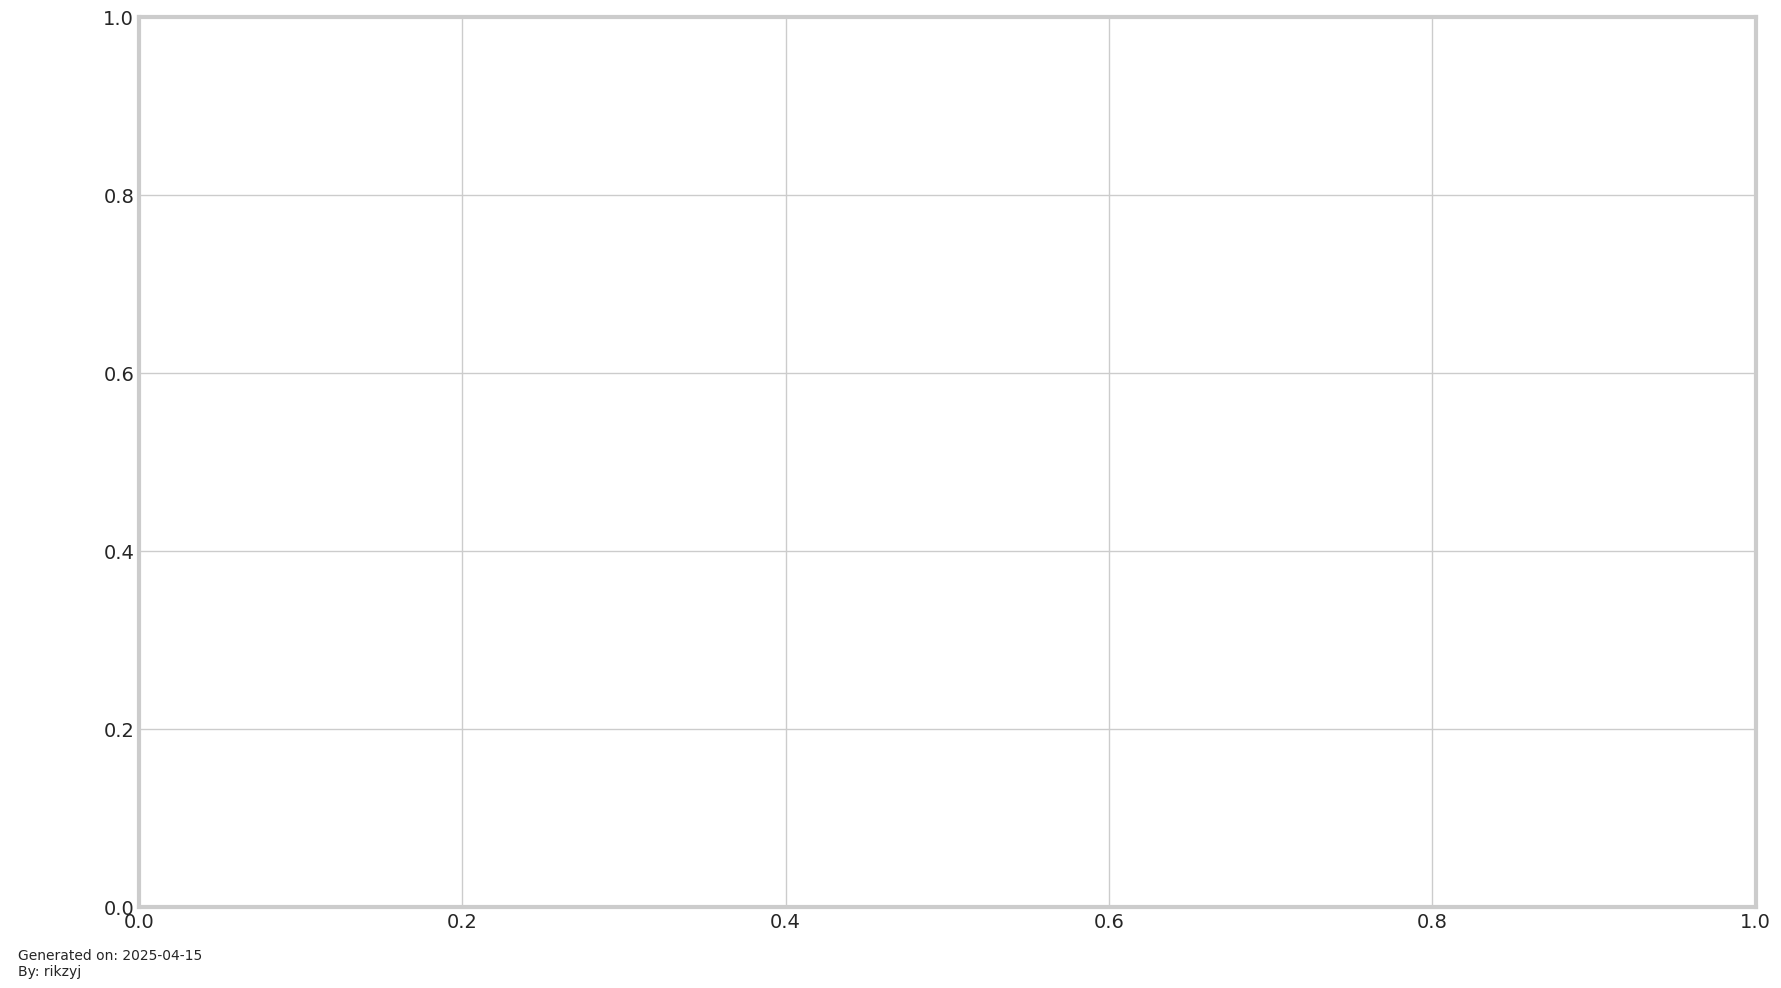

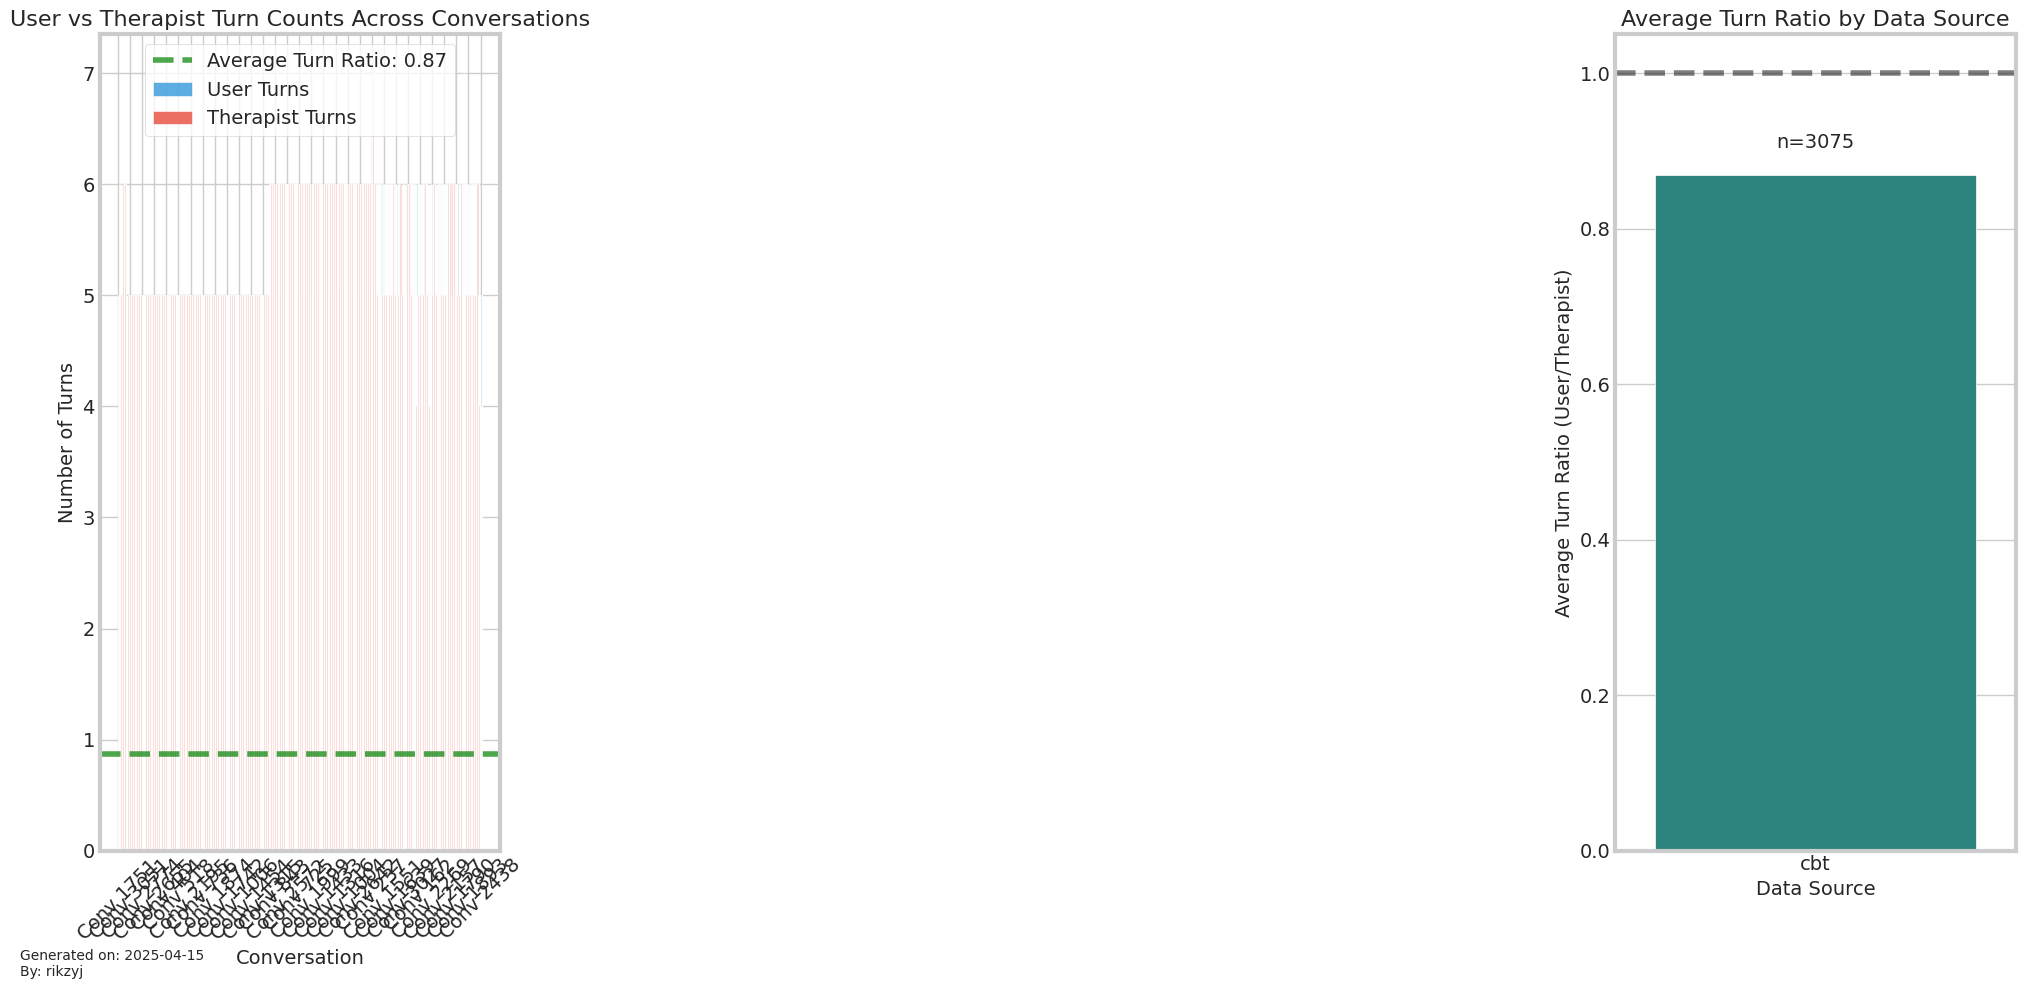

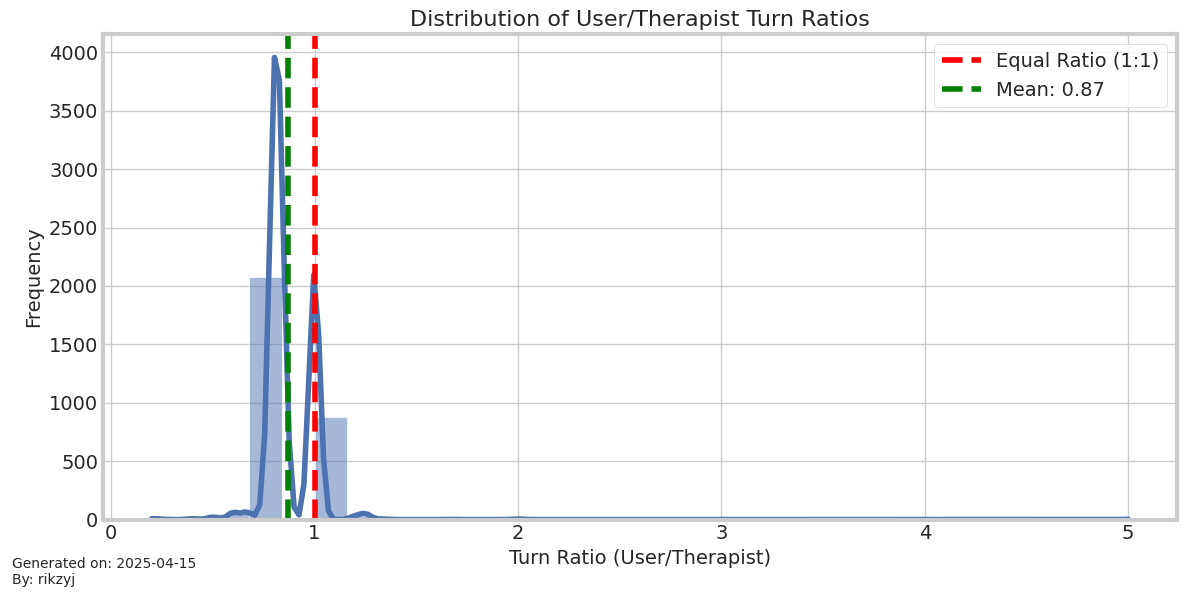


Turn Ratio Statistics by Source:
       User Turns                        Therapist Turns                   \
             mean median       std count            mean median       std   
Source                                                                      
cbt       4.63252    5.0  0.692169  3075        5.347317    5.0  0.571232   

       Turn Ratio (User/Therapist)                      
                              mean    median       std  
Source                                                  
cbt                        0.86889  0.833333  0.131766  

Overall Statistics:
Average user turns per conversation: 4.63
Average therapist turns per conversation: 5.35
Average turn ratio (user/therapist): 0.87
Median turn ratio: 0.83

Conversations with unusually high user-to-therapist ratio (>1.00):
      Conversation ID  User Turns  Therapist Turns  \
1524             1524           5                1   
1599             1599           6                3   
2513             2513  

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive')

# Path to your dataset
file_path = "/content/drive/MyDrive/ACADEMICS/FYP/4. Implementation/Datasets/Final Dataset/Psych8k_and_CBT_Conversation_Dataset.json"

# Load the dataset
print("Loading dataset...")
with open(file_path, 'r') as file:
    data = json.load(file)
print(f"Loaded {len(data)} conversations")

# Filter multi-turn conversations (single-turn won't be interesting for turn ratios)
multi_turn_conversations = [conv for conv in data
                           if conv.get('metadata', {}).get('type', '') == 'multi-turn' and
                           len(conv.get('turns', [])) > 2]  # At least 3 turns to be meaningful
print(f"Found {len(multi_turn_conversations)} multi-turn conversations with 3+ turns")

# Initialize lists to store conversation data
conversation_ids = []
user_turn_counts = []
therapist_turn_counts = []
turn_ratios = []  # user turns / therapist turns
sources = []

# Process each conversation to extract turn data
print("Analyzing conversation turns...")
for idx, conversation in enumerate(multi_turn_conversations):
    turns = conversation.get('turns', [])

    # Initialize counters
    user_turns = 0
    therapist_turns = 0

    # Count turns by role
    for turn in turns:
        role = turn.get('role', '').lower()
        if role in ['user', 'patient']:
            user_turns += 1
        elif role == 'therapist':
            therapist_turns += 1

    # Only include conversations with both user and therapist turns
    if user_turns > 0 and therapist_turns > 0:
        # Add to our lists
        conversation_ids.append(idx)
        user_turn_counts.append(user_turns)
        therapist_turn_counts.append(therapist_turns)

        # Calculate ratio (user turns / therapist turns)
        ratio = user_turns / therapist_turns
        turn_ratios.append(ratio)

        # Add source
        source = conversation.get('metadata', {}).get('source', 'unknown')
        sources.append(source)

# Create DataFrame for plotting
df = pd.DataFrame({
    'Conversation ID': conversation_ids,
    'User Turns': user_turn_counts,
    'Therapist Turns': therapist_turn_counts,
    'Turn Ratio (User/Therapist)': turn_ratios,
    'Source': sources
})

# Sort by turn ratio for better visualization
df_sorted = df.sort_values('Turn Ratio (User/Therapist)')

# Calculate statistics by source
source_stats = df.groupby('Source').agg({
    'User Turns': ['mean', 'median', 'std', 'count'],
    'Therapist Turns': ['mean', 'median', 'std'],
    'Turn Ratio (User/Therapist)': ['mean', 'median', 'std']
})

# Set up the figure for the main bar chart
plt.figure(figsize=(18, 10))
sns.set_style("whitegrid")

# Create a plot with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# 1. Bar chart comparing user and therapist turns
# Prepare data for grouped bars
bar_width = 0.4
x = np.arange(len(df_sorted))

# Create the bars
user_bars = ax1.bar(x - bar_width/2, df_sorted['User Turns'], bar_width,
                  color='#3498db', label='User Turns', alpha=0.8)
therapist_bars = ax1.bar(x + bar_width/2, df_sorted['Therapist Turns'], bar_width,
                       color='#e74c3c', label='Therapist Turns', alpha=0.8)

# Add labels and title
ax1.set_xlabel('Conversation', fontsize=14)
ax1.set_ylabel('Number of Turns', fontsize=14)
ax1.set_title('User vs Therapist Turn Counts Across Conversations', fontsize=16)

# Limit the x-axis labels to prevent overcrowding
if len(df_sorted) > 30:
    step = len(df_sorted) // 30
    visible_indices = np.arange(0, len(df_sorted), step)
    ax1.set_xticks(visible_indices)
    ax1.set_xticklabels([f"Conv {df_sorted['Conversation ID'].iloc[i]}" for i in visible_indices], rotation=45)
else:
    ax1.set_xticks(x)
    ax1.set_xticklabels([f"Conv {id}" for id in df_sorted['Conversation ID']], rotation=45)

# Add a horizontal line for the average ratio
avg_ratio = df['Turn Ratio (User/Therapist)'].mean()
ax1.axhline(y=avg_ratio, linestyle='--', color='green', alpha=0.7,
           label=f'Average Turn Ratio: {avg_ratio:.2f}')

# Add legend
ax1.legend()

# 2. Turn ratio distribution by source
# Calculate the average turn ratio by source
source_avg_ratio = df.groupby('Source')['Turn Ratio (User/Therapist)'].mean().reset_index()
source_avg_ratio = source_avg_ratio.sort_values('Turn Ratio (User/Therapist)')

# Create barplot of turn ratios by source
bars = sns.barplot(x='Source', y='Turn Ratio (User/Therapist)', data=source_avg_ratio, ax=ax2,
                 palette='viridis')

# Add the number of conversations for each source as text labels
for i, source in enumerate(source_avg_ratio['Source']):
    count = df[df['Source'] == source].shape[0]
    ratio = source_avg_ratio['Turn Ratio (User/Therapist)'].iloc[i]
    ax2.text(i, ratio + 0.03, f"n={count}", ha='center', va='bottom')

# Add a horizontal line at ratio = 1 (equal turns)
ax2.axhline(y=1, linestyle='--', color='black', alpha=0.5,
           label='Equal Turns (1:1 ratio)')

ax2.set_xlabel('Data Source', fontsize=14)
ax2.set_ylabel('Average Turn Ratio (User/Therapist)', fontsize=14)
ax2.set_title('Average Turn Ratio by Data Source', fontsize=16)

# Create a histogram for the overall ratio distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Turn Ratio (User/Therapist)', bins=30, kde=True)
plt.title('Distribution of User/Therapist Turn Ratios', fontsize=16)
plt.xlabel('Turn Ratio (User/Therapist)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(x=1, color='red', linestyle='--', label='Equal Ratio (1:1)')
plt.axvline(x=df['Turn Ratio (User/Therapist)'].mean(), color='green', linestyle='--',
           label=f'Mean: {df["Turn Ratio (User/Therapist)"].mean():.2f}')
plt.legend()

# Add current date and username to all figures
current_date = "2025-04-15"
current_user = "rikzyj"

for fig_num in plt.get_fignums():
    plt.figure(fig_num)
    plt.annotate(
        f"Generated on: {current_date}\nBy: {current_user}",
        xy=(0.01, 0.01),
        xycoords='figure fraction',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
        va='bottom',
        fontsize=10
    )
    plt.tight_layout()

    # Save each figure with a unique name
    plt.savefig(f"turn_ratio_figure_{fig_num}.png", dpi=300, bbox_inches='tight')

# Show figures
plt.show()

# Print detailed statistics
print("\nTurn Ratio Statistics by Source:")
print(source_stats)

print("\nOverall Statistics:")
print(f"Average user turns per conversation: {df['User Turns'].mean():.2f}")
print(f"Average therapist turns per conversation: {df['Therapist Turns'].mean():.2f}")
print(f"Average turn ratio (user/therapist): {df['Turn Ratio (User/Therapist)'].mean():.2f}")
print(f"Median turn ratio: {df['Turn Ratio (User/Therapist)'].median():.2f}")

# Identify conversations with unusual turn ratios
threshold_high = df['Turn Ratio (User/Therapist)'].quantile(0.95)
threshold_low = df['Turn Ratio (User/Therapist)'].quantile(0.05)

print(f"\nConversations with unusually high user-to-therapist ratio (>{threshold_high:.2f}):")
high_ratio = df[df['Turn Ratio (User/Therapist)'] > threshold_high].sort_values('Turn Ratio (User/Therapist)', ascending=False)
print(high_ratio[['Conversation ID', 'User Turns', 'Therapist Turns', 'Turn Ratio (User/Therapist)', 'Source']])

print(f"\nConversations with unusually low user-to-therapist ratio (<{threshold_low:.2f}):")
low_ratio = df[df['Turn Ratio (User/Therapist)'] < threshold_low].sort_values('Turn Ratio (User/Therapist)')
print(low_ratio[['Conversation ID', 'User Turns', 'Therapist Turns', 'Turn Ratio (User/Therapist)', 'Source']])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading dataset...
Loaded 11186 conversations
Finding suitable multi-turn conversations...
Found 3073 suitable multi-turn conversations
Selected conversation: Conversation Unknown ID (ID: Unknown ID) from cbt
Number of turns: 11


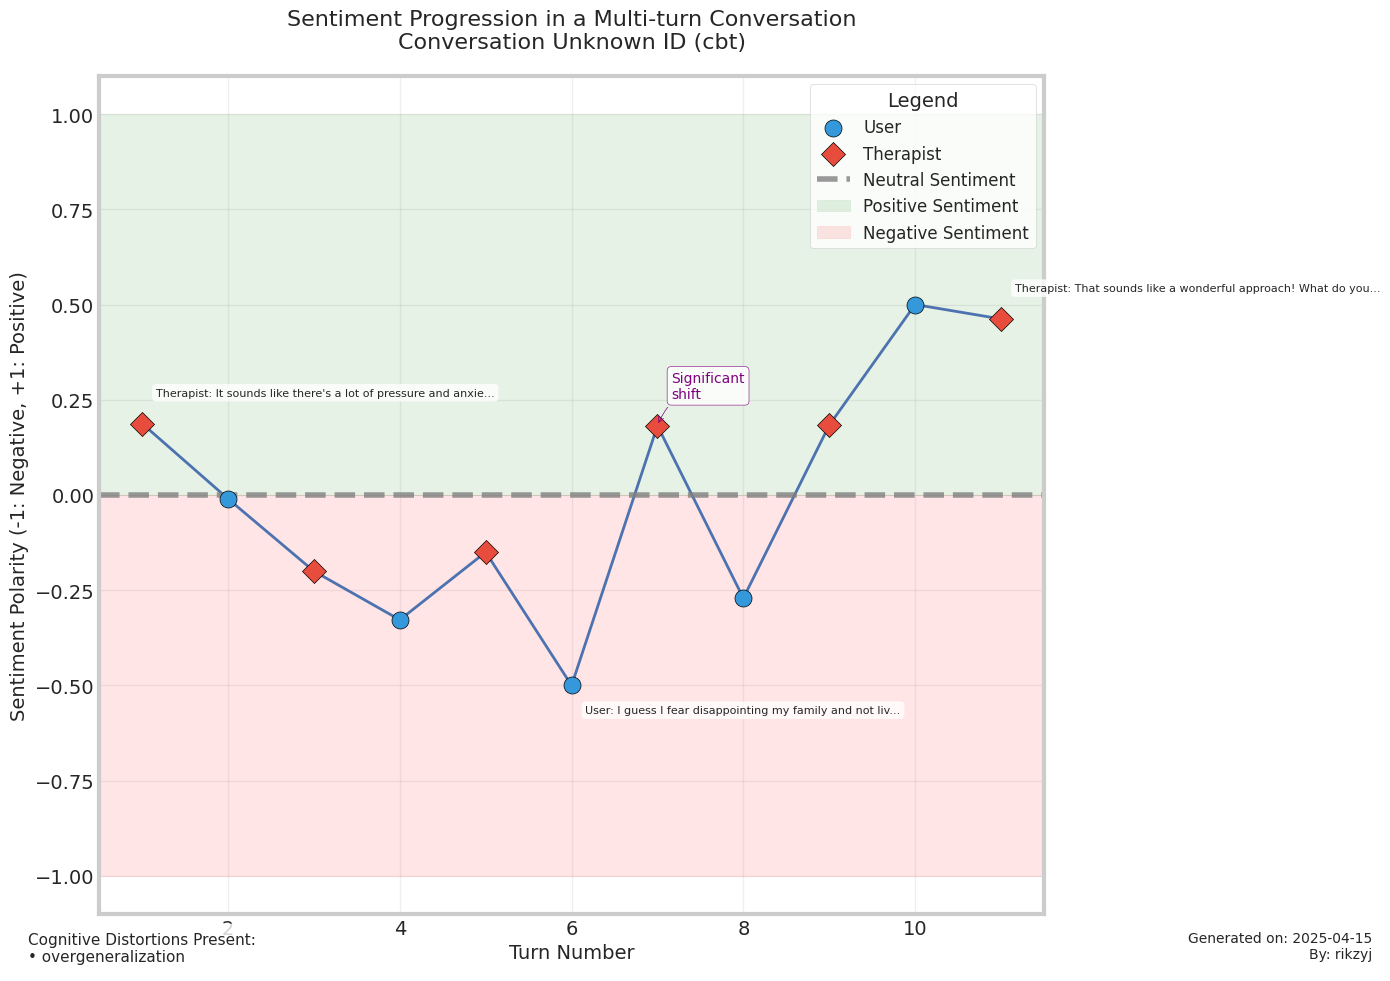


Conversation Summary:
Total turns: 11
User turns: 5
Therapist turns: 6
Average polarity: 0.01
User average polarity: -0.12
Therapist average polarity: 0.11

Sentiment Progression Analysis:
Average user sentiment change between turns: 0.128

Largest sentiment shifts:
Turn 7 (Therapist): -0.50 → 0.18, shift: 0.68
Turn 9 (Therapist): -0.27 → 0.18, shift: 0.45
Turn 8 (User): 0.18 → -0.27, shift: 0.45

Correlation between turn length and sentiment polarity: 0.108

Detailed Turn Data:
 Turn Number      Role  Polarity  Word Count                                                                                                 Content
           1 Therapist  0.187500          36 It sounds like there's a lot of pressure and anxiety around decision-making for both you and your si...
           2      User -0.010000          34 I often struggle even with small decisions, like what to eat, but it gets worse with bigger choices,...
           3 Therapist -0.200000          35 I can sense how exhaust

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import numpy as np
from datetime import datetime
import random

# Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive')

# Path to your dataset
file_path = "/content/drive/MyDrive/ACADEMICS/FYP/4. Implementation/Datasets/Final Dataset/Psych8k_and_CBT_Conversation_Dataset.json"

# Load the dataset
print("Loading dataset...")
with open(file_path, 'r') as file:
    data = json.load(file)
print(f"Loaded {len(data)} conversations")

# Function to calculate sentiment polarity
def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

# Filter multi-turn conversations with sufficient length for meaningful analysis
print("Finding suitable multi-turn conversations...")
multi_turn_conversations = []
for conv in data:
    turns = conv.get('turns', [])
    if (conv.get('metadata', {}).get('type', '') == 'multi-turn' and
        len(turns) >= 6):  # At least 6 turns to see meaningful progression

        # Ensure there's a mix of user and therapist turns
        roles = [turn.get('role', '').lower() for turn in turns]
        if ('user' in roles or 'patient' in roles) and 'therapist' in roles:
            multi_turn_conversations.append(conv)

print(f"Found {len(multi_turn_conversations)} suitable multi-turn conversations")

# Function to select the best conversation for sentiment analysis
def select_best_conversation(conversations, min_turns=6, max_turns=20):
    # First try to find conversations with cognitive distortions for more interesting patterns
    distortion_convs = [conv for conv in conversations
                       if conv.get('metadata', {}).get('cognitive_distortions', ['none']) != ['none']]

    if distortion_convs:
        candidates = distortion_convs
    else:
        candidates = conversations

    # Filter by turn count (not too short, not too long)
    candidates = [conv for conv in candidates
                 if min_turns <= len(conv.get('turns', [])) <= max_turns]

    if not candidates:
        # If no suitable candidates, just take the first conversation
        return conversations[0] if conversations else None

    # Select a conversation with more sentiment variation if possible
    max_variation = 0
    best_conv = candidates[0]

    for conv in candidates[:10]:  # Check first 10 to avoid excessive computation
        turns = conv.get('turns', [])
        polarities = [get_sentiment_polarity(turn.get('content', '')) for turn in turns]
        variation = np.std(polarities) if polarities else 0

        if variation > max_variation:
            max_variation = variation
            best_conv = conv

    return best_conv

# Select a good sample conversation or use randomly chosen one
sample_conversation = select_best_conversation(multi_turn_conversations)

if not sample_conversation:
    print("No suitable multi-turn conversation found!")
    exit()

# Extract conversation ID or title
conversation_id = sample_conversation.get('id', 'Unknown ID')
conversation_title = sample_conversation.get('title', f"Conversation {conversation_id}")
conversation_source = sample_conversation.get('metadata', {}).get('source', 'Unknown Source')

print(f"Selected conversation: {conversation_title} (ID: {conversation_id}) from {conversation_source}")
print(f"Number of turns: {len(sample_conversation.get('turns', []))}")

# Process the conversation turns to extract sentiment
turns_data = []

for i, turn in enumerate(sample_conversation.get('turns', [])):
    role = turn.get('role', '').lower()
    content = turn.get('content', '')

    # Make role consistent
    if role in ['user', 'patient']:
        role = 'User'
    elif role == 'therapist':
        role = 'Therapist'
    else:
        role = 'Unknown'

    # Calculate sentiment polarity
    polarity = get_sentiment_polarity(content)

    # Count words
    word_count = len(content.split())

    # Create turn data
    turns_data.append({
        'Turn Number': i + 1,
        'Role': role,
        'Content': content[:100] + '...' if len(content) > 100 else content,  # Truncate for display
        'Word Count': word_count,
        'Polarity': polarity,
        'Turn Index': i
    })

# Create a DataFrame
df = pd.DataFrame(turns_data)

# Create the line plot
plt.figure(figsize=(14, 10))

# Set seaborn style
sns.set_style("whitegrid")
sns.set_palette("deep")

# Create the main line plot for sentiment progression
ax = sns.lineplot(
    data=df,
    x='Turn Number',
    y='Polarity',
    marker='o',
    markersize=10,
    linewidth=2
)

# Add markers with different colors and shapes for user and therapist
for role in ['User', 'Therapist']:
    role_data = df[df['Role'] == role]
    color = '#3498db' if role == 'User' else '#e74c3c'
    marker = 'o' if role == 'User' else 'D'

    ax.scatter(
        role_data['Turn Number'],
        role_data['Polarity'],
        s=150,
        color=color,
        marker=marker,
        label=role,
        edgecolor='black',
        zorder=3
    )

# Add reference lines
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.8, label='Neutral Sentiment')

# Shade the regions
plt.axhspan(0, 1, alpha=0.1, color='green', label='Positive Sentiment')
plt.axhspan(-1, 0, alpha=0.1, color='red', label='Negative Sentiment')

# Highlight extreme sentiment shifts
polarity_changes = df['Polarity'].diff().abs()
significant_shifts = df.index[polarity_changes > 0.5].tolist()

for shift in significant_shifts:
    if shift > 0:  # Skip the first turn
        plt.annotate(
            f"Significant\nshift",
            xy=(df['Turn Number'].iloc[shift], df['Polarity'].iloc[shift]),
            xytext=(10, 20),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.3', color='purple'),
            color='purple',
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="purple", alpha=0.8)
        )

# Customize the plot
plt.title(f"Sentiment Progression in a Multi-turn Conversation\n{conversation_title} ({conversation_source})", fontsize=16, pad=20)
plt.xlabel("Turn Number", fontsize=14)
plt.ylabel("Sentiment Polarity (-1: Negative, +1: Positive)", fontsize=14)
plt.grid(True, alpha=0.3)

# Create a custom legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Legend", loc="upper right", fontsize=12)

# Set y-axis limits with some padding
plt.ylim(-1.1, 1.1)

# Add annotations showing turn content on hover (for interactive environments)
# This will only work in notebook environment
try:
    from mpld3 import plugins, fig_to_html
    import mpld3

    # Create tooltip with turn content
    tooltip_text = [f"Turn {row['Turn Number']}\nRole: {row['Role']}\n\n{row['Content']}"
                   for _, row in df.iterrows()]

    # Apply tooltip to the scatter points
    points = ax.collections
    for i, point in enumerate(points):
        if i < len(tooltip_text):
            plugins.PointHTMLTooltip(point, [tooltip_text[i]], css=tooltip_css)

    # Attempt to enable interactive features
    mpld3.enable_notebook()
except:
    # Fallback: Add annotations for key points
    # Add content for a few key turns as text annotations
    key_turns = [0, len(df)//2, len(df)-1]  # First, middle, last
    for i in key_turns:
        if i < len(df):
            row = df.iloc[i]
            plt.annotate(
                f"{row['Role']}: {row['Content'][:50]}...",
                xy=(row['Turn Number'], row['Polarity']),
                xytext=(10, (-1)**i * 20),  # Alternate above/below
                textcoords='offset points',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
                fontsize=8
            )

# Add information about cognitive distortions if present
distortions = sample_conversation.get('metadata', {}).get('cognitive_distortions', [])
if distortions and distortions != ['none']:
    distortion_text = "Cognitive Distortions Present:\n" + "\n".join([f"• {d}" for d in distortions])
    plt.annotate(
        distortion_text,
        xy=(0.02, 0.02),
        xycoords='figure fraction',
        bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8),
        fontsize=11
    )

# Add current date and username
current_date = "2025-04-15"
current_user = "rikzyj"
plt.annotate(
    f"Generated on: {current_date}\nBy: {current_user}",
    xy=(0.98, 0.02),
    xycoords='figure fraction',
    bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
    va='bottom',
    ha='right',
    fontsize=10
)

# Improve layout
plt.tight_layout()

# Save the figure
plt.savefig("sentiment_progression_plot.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print additional statistics and conversation details
print("\nConversation Summary:")
print(f"Total turns: {len(df)}")
print(f"User turns: {df[df['Role'] == 'User'].shape[0]}")
print(f"Therapist turns: {df[df['Role'] == 'Therapist'].shape[0]}")
print(f"Average polarity: {df['Polarity'].mean():.2f}")
print(f"User average polarity: {df[df['Role'] == 'User']['Polarity'].mean():.2f}")
print(f"Therapist average polarity: {df[df['Role'] == 'Therapist']['Polarity'].mean():.2f}")

# Analysis of sentiment progression
print("\nSentiment Progression Analysis:")
user_polarity_change = df[df['Role'] == 'User']['Polarity'].diff().mean()
print(f"Average user sentiment change between turns: {user_polarity_change:.3f}")

# Find the most significant sentiment shifts
print("\nLargest sentiment shifts:")
df['Shift'] = df['Polarity'].diff().abs()
top_shifts = df.sort_values('Shift', ascending=False).head(3)
for i, row in top_shifts.iterrows():
    if i > 0:  # Skip first turn (no previous turn)
        prev_turn = df.iloc[i-1]
        print(f"Turn {int(row['Turn Number'])} ({row['Role']}): {prev_turn['Polarity']:.2f} → {row['Polarity']:.2f}, shift: {row['Shift']:.2f}")

# Optional: Show correlation between turn length and sentiment
correlation = df['Word Count'].corr(df['Polarity'])
print(f"\nCorrelation between turn length and sentiment polarity: {correlation:.3f}")

# Creating a table of all turns with their content and sentiment
print("\nDetailed Turn Data:")
print(df[['Turn Number', 'Role', 'Polarity', 'Word Count', 'Content']].to_string(index=False))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading dataset...
Loaded 11186 conversations
Extracting cognitive distortion data...
Found 23200 instances of cognitive distortions
Unique distortion types: 18


<Figure size 1400x1000 with 0 Axes>

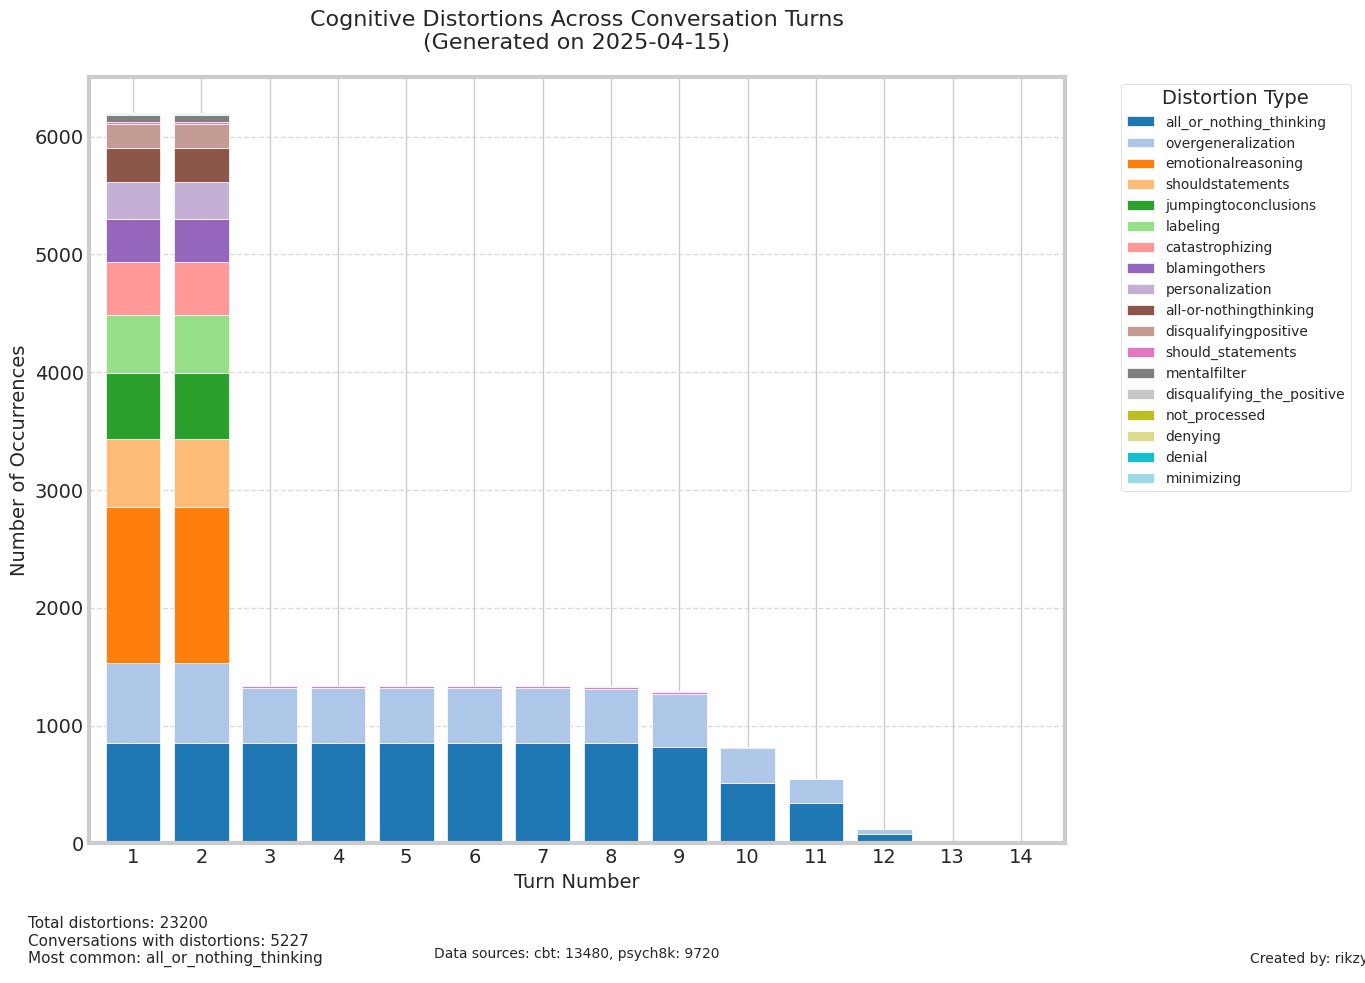

<Figure size 1200x800 with 0 Axes>

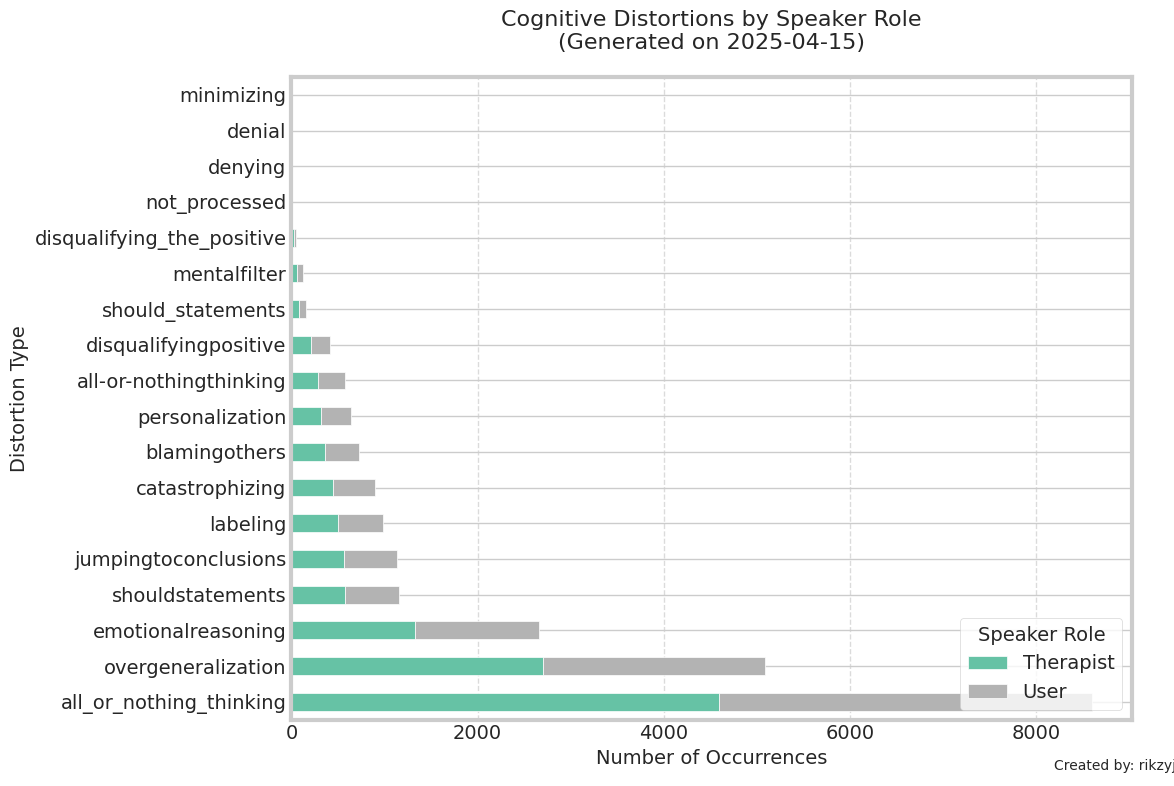


Cognitive Distortion Statistics:

Most Common Distortions:
Distortion Type
all_or_nothing_thinking    8596
overgeneralization         5089
emotionalreasoning         2656
shouldstatements           1150
jumpingtoconclusions       1130
labeling                    988
catastrophizing             902
blamingothers               730
personalization             638
all-or-nothingthinking      576

Distortion Occurrences by Turn Number:
Turn Number
1     6198
2     6198
3     1337
4     1337
5     1337
6     1337
7     1337
8     1333
9     1289
10     817
11     550
12     121
13       7
14       2

Distortions by Speaker Role:
     Role            Distortion Type  Count
Therapist    all_or_nothing_thinking   4591
Therapist         overgeneralization   2703
Therapist         emotionalreasoning   1328
Therapist           shouldstatements    575
Therapist       jumpingtoconclusions    565
Therapist                   labeling    495
Therapist            catastrophizing    451
Therapist       

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter, defaultdict
from datetime import datetime

# Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive')

# Path to your dataset
file_path = "/content/drive/MyDrive/ACADEMICS/FYP/4. Implementation/Datasets/Final Dataset/Psych8k_and_CBT_Conversation_Dataset.json"

# Load the dataset
print("Loading dataset...")
with open(file_path, 'r') as file:
    data = json.load(file)
print(f"Loaded {len(data)} conversations")

# Normalize the distortion names to handle variations in formatting
def normalize_distortion(distortion):
    # Convert to lowercase and remove spaces
    normalized = distortion.lower().replace(' ', '')

    # Handle common variations
    mapping = {
        'allornothingthinking': 'allornothingthinking',
        'blackandwhitethinking': 'allornothingthinking',  # These are synonyms
        'dichotomousthinking': 'allornothingthinking',    # These are synonyms
        'overgeneralizing': 'overgeneralization',
        'overgeneralization': 'overgeneralization',
        'mentalfilter': 'mentalfilter',
        'negativefilter': 'mentalfilter',
        'disqualifyingthepositive': 'disqualifyingpositive',
        'disqualifyingpositive': 'disqualifyingpositive',
        'jumping': 'jumpingtoconclusions',
        'jumpingtoconclusions': 'jumpingtoconclusions',
        'mindreading': 'mindreading',
        'fortunetelling': 'fortunetelling',
        'catastrophizing': 'catastrophizing',
        'magnification': 'catastrophizing',    # Often used interchangeably
        'minimization': 'minimization',
        'emotionalreasoning': 'emotionalreasoning',
        'shouldstatements': 'shouldstatements',
        'muststatements': 'shouldstatements',  # Similar concept
        'labeling': 'labeling',
        'mislabeling': 'labeling',
        'personalization': 'personalization',
        'blamingothers': 'blamingothers',
        'blame': 'blamingothers',
        'nonereallymentioned': 'none',
        'noneatthetime': 'none',
        'none': 'none'
    }

    # Try to map the normalized distortion name
    for key, value in mapping.items():
        if key in normalized:
            return value

    # If no match, return the original normalized name
    return normalized

# Extract cognitive distortion data from conversations
print("Extracting cognitive distortion data...")

# Store data about distortions per turn
turns_with_distortions = []
distortion_types = set()
max_turns = 0  # Track the maximum number of turns

# Process each conversation
for i, conversation in enumerate(data):
    # Skip conversations without cognitive distortions
    if not conversation.get('metadata', {}).get('cognitive_distortions'):
        continue

    # Get conversation details
    conversation_id = conversation.get('id', f'conv_{i}')
    source = conversation.get('metadata', {}).get('source', 'unknown')
    turns = conversation.get('turns', [])

    # Track maximum turns for plotting
    if len(turns) > max_turns:
        max_turns = len(turns)

    # Get the list of cognitive distortions for this conversation
    raw_distortions = conversation.get('metadata', {}).get('cognitive_distortions', [])

    # If there's only one "none" entry, skip this conversation
    if raw_distortions == ["none"] or not raw_distortions:
        continue

    # Normalize distortion names
    distortions = [normalize_distortion(d) for d in raw_distortions if d.lower() != "none"]

    # Skip if no valid distortions after normalization
    if not distortions:
        continue

    # Add these distortions to the set of all types
    distortion_types.update(distortions)

    # For each turn in the conversation, record which distortions are present
    for turn_idx, turn in enumerate(turns):
        role = turn.get('role', '').lower()

        # Normalize role
        if role in ['user', 'patient']:
            role = 'User'
        elif role == 'therapist':
            role = 'Therapist'
        else:
            role = 'Unknown'

        # Record data for this turn
        for distortion in distortions:
            turns_with_distortions.append({
                'Conversation ID': conversation_id,
                'Source': source,
                'Turn Number': turn_idx + 1,
                'Role': role,
                'Distortion Type': distortion
            })

print(f"Found {len(turns_with_distortions)} instances of cognitive distortions")
print(f"Unique distortion types: {len(distortion_types)}")
distortion_types = list(distortion_types)

# Create DataFrame
df = pd.DataFrame(turns_with_distortions)

# Aggregate data for stacked bar chart (count distortions by turn number)
distortion_by_turn = df.groupby(['Turn Number', 'Distortion Type']).size().unstack().fillna(0)

# Only include the first 15 turns for better visualization (most conversations are shorter)
max_turns_to_show = 15
if max_turns > max_turns_to_show:
    if len(distortion_by_turn) > max_turns_to_show:
        distortion_by_turn = distortion_by_turn.iloc[:max_turns_to_show]
    max_turns = max_turns_to_show

# Create a pivot table grouping by turn number and distortion type
pivot_data = pd.pivot_table(
    data=df[df['Turn Number'] <= max_turns],
    index='Turn Number',
    columns='Distortion Type',
    aggfunc='size',
    fill_value=0
)

# Sort distortion types by total frequency for better visualization
distortion_totals = pivot_data.sum()
sorted_distortions = distortion_totals.sort_values(ascending=False).index.tolist()

# Reorder columns based on sorted distortions
pivot_data = pivot_data[sorted_distortions]

# Create stacked bar chart
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

# Generate a colormap with distinct colors
num_distortions = len(sorted_distortions)
colors = sns.color_palette("husl", num_distortions)

# Create stacked bars
pivot_data.plot(
    kind='bar',
    stacked=True,
    colormap=plt.cm.get_cmap('tab20', num_distortions),
    figsize=(14, 10),
    width=0.8
)

# Add title and labels
current_date = "2025-04-15"
current_user = "rikzyj"

plt.title(f'Cognitive Distortions Across Conversation Turns\n(Generated on {current_date})',
          fontsize=16, pad=20)
plt.xlabel('Turn Number', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xticks(rotation=0)

# Improve legend (put it outside the plot)
plt.legend(title='Distortion Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data source information
source_counts = df['Source'].value_counts()
source_info = ', '.join([f"{source}: {count}" for source, count in source_counts.items()])
plt.annotate(
    f"Data sources: {source_info}",
    xy=(0.5, -0.15),
    xycoords='axes fraction',
    ha='center',
    fontsize=10
)

# Add creator name
plt.annotate(
    f"Created by: {current_user}",
    xy=(0.98, 0.02),
    xycoords='figure fraction',
    ha='right',
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.8)
)

# Add some statistics as an annotation
total_distortions = df.shape[0]
total_convs = df['Conversation ID'].nunique()
most_common = df['Distortion Type'].value_counts().index[0]
stats_text = (
    f"Total distortions: {total_distortions}\n"
    f"Conversations with distortions: {total_convs}\n"
    f"Most common: {most_common}"
)
plt.annotate(
    stats_text,
    xy=(0.02, 0.02),
    xycoords='figure fraction',
    fontsize=11,
    bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8)
)

# Improve layout
plt.tight_layout()

# Save the figure
plt.savefig("cognitive_distortions_by_turn.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Create additional visualization: role breakdown
plt.figure(figsize=(12, 8))

# Create a pivot table for distortions by role
role_pivot = pd.pivot_table(
    data=df,
    index='Distortion Type',
    columns='Role',
    aggfunc='size',
    fill_value=0
)

# Sort by total frequency
role_pivot['Total'] = role_pivot.sum(axis=1)
role_pivot = role_pivot.sort_values('Total', ascending=False)
role_pivot = role_pivot.drop('Total', axis=1)

# Create horizontal bar chart
role_pivot.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 8),
    colormap='Set2'
)

plt.title(f'Cognitive Distortions by Speaker Role\n(Generated on {current_date})',
          fontsize=16, pad=20)
plt.xlabel('Number of Occurrences', fontsize=14)
plt.ylabel('Distortion Type', fontsize=14)

plt.legend(title='Speaker Role', loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add creator name
plt.annotate(
    f"Created by: {current_user}",
    xy=(0.98, 0.02),
    xycoords='figure fraction',
    ha='right',
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.8)
)

plt.tight_layout()
plt.savefig("cognitive_distortions_by_role.png", dpi=300, bbox_inches='tight')
plt.show()

# Print additional statistics
print("\nCognitive Distortion Statistics:")

# Most common distortions
print("\nMost Common Distortions:")
print(df['Distortion Type'].value_counts().head(10).to_string())

# Distortions by turn number
print("\nDistortion Occurrences by Turn Number:")
print(df['Turn Number'].value_counts().sort_index().head(15).to_string())

# Distortions by role
print("\nDistortions by Speaker Role:")
print(df.groupby(['Role', 'Distortion Type']).size().reset_index(name='Count')
      .sort_values(['Role', 'Count'], ascending=[True, False])
      .to_string(index=False))

# Find patterns of co-occurrences within conversations
print("\nDistortion Co-occurrence Analysis:")
conversation_distortions = defaultdict(list)

for conv_id, group in df.groupby('Conversation ID'):
    distortions = group['Distortion Type'].unique().tolist()
    if len(distortions) > 1:
        print(f"Conversation {conv_id}: {', '.join(distortions)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading dataset...
Loaded 11186 conversations
Analyzing conversations...

Basic Statistics:
Single-turn conversations: 8086
Multi-turn conversations: 3100


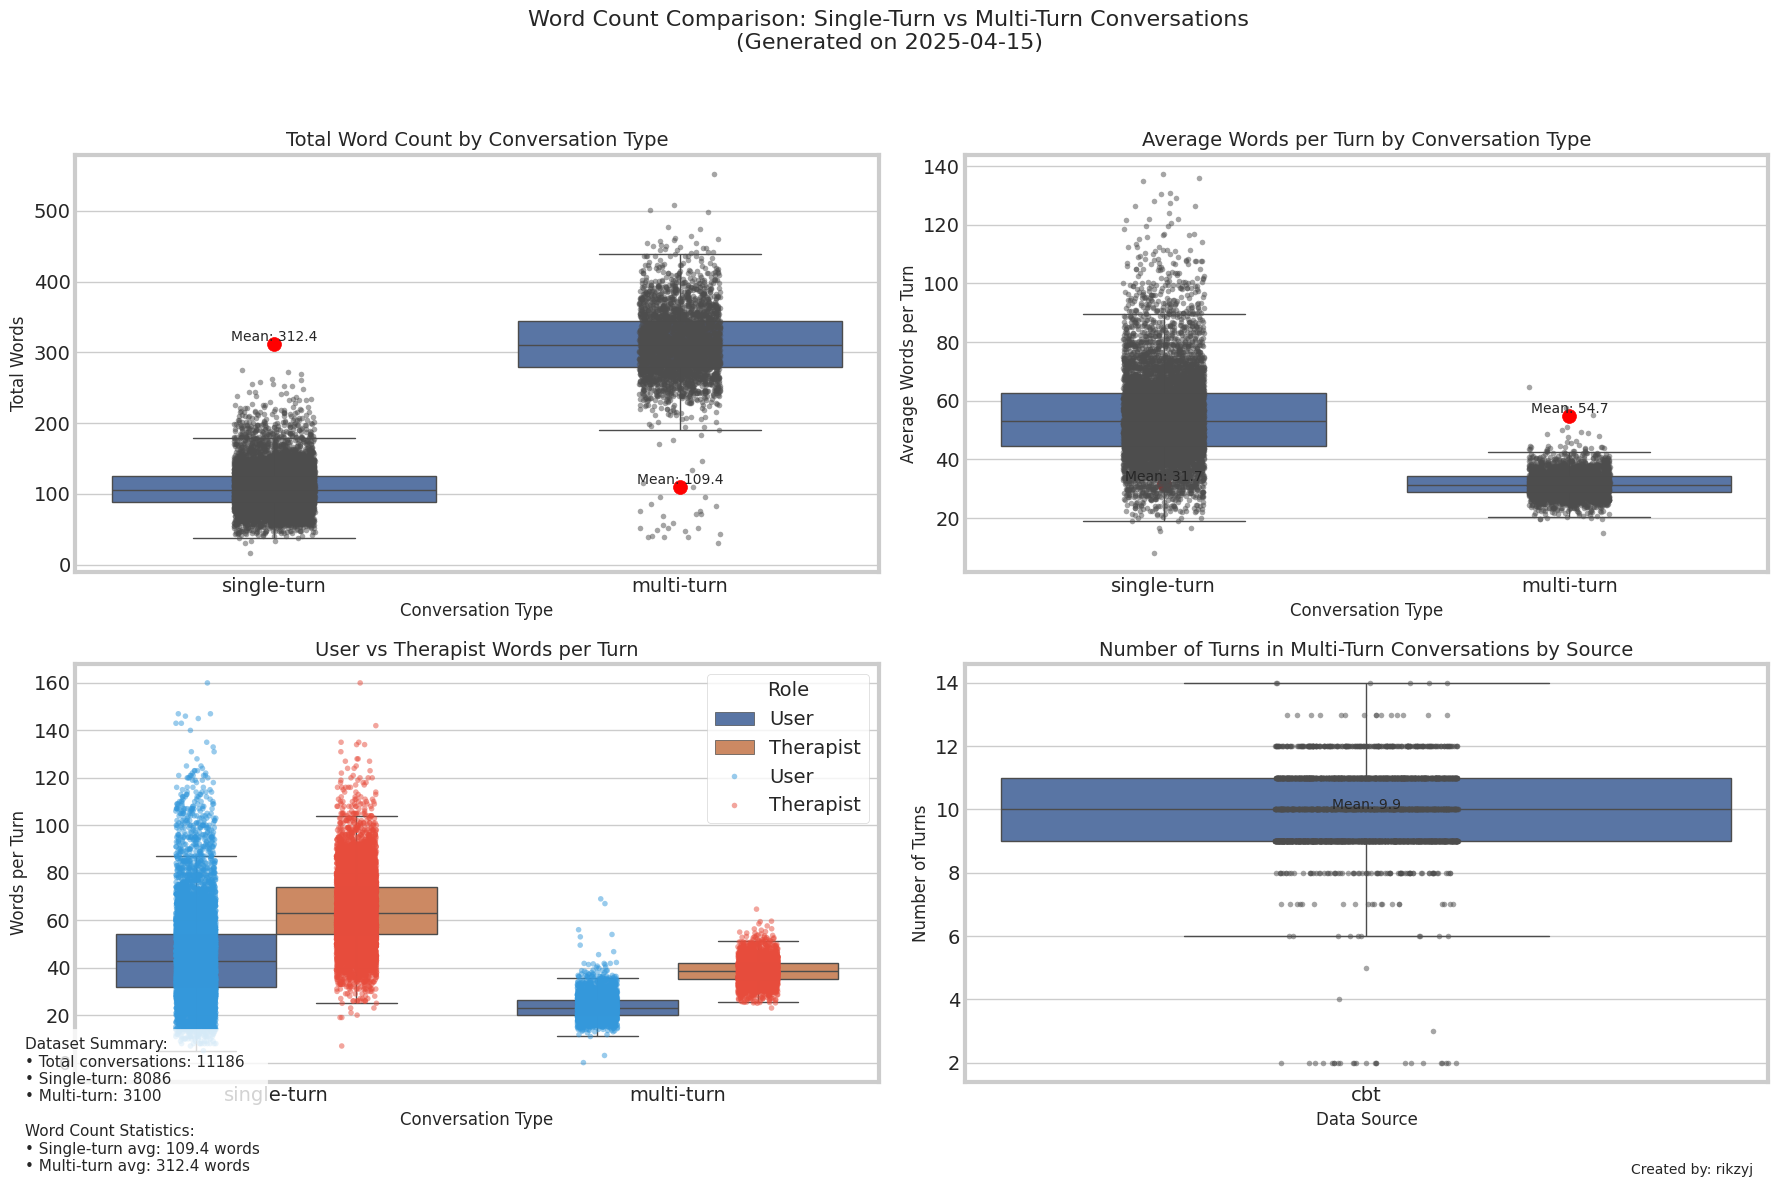


Statistical Tests:
Total Word Count - t-test: t=-208.264, p=0.0000
  The difference in total word counts is statistically significant
Average Words per Turn - t-test: t=125.204, p=0.0000
  The difference in average words per turn is statistically significant

Detailed Statistics:

Total Word Count:
                    count        mean        std   min    25%    50%    75%  \
Conversation Type                                                             
multi-turn         3100.0  312.366129  50.993016  30.0  280.0  311.0  344.0   
single-turn        8086.0  109.354192  30.012048  16.0   89.0  106.0  125.0   

                     max  
Conversation Type         
multi-turn         553.0  
single-turn        275.0  

Average Words per Turn:
                    count       mean        std   min        25%        50%  \
Conversation Type                                                             
multi-turn         3100.0  31.653110   4.301336  15.0  28.727273  31.333333   
single-turn 

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive')

# Path to your dataset
file_path = "/content/drive/MyDrive/ACADEMICS/FYP/4. Implementation/Datasets/Final Dataset/Psych8k_and_CBT_Conversation_Dataset.json"

# Load the dataset
print("Loading dataset...")
with open(file_path, 'r') as file:
    data = json.load(file)
print(f"Loaded {len(data)} conversations")

# Function to count words in a text
def count_words(text):
    return len(text.split())

# Initialize lists to store data
conversation_types = []  # 'single-turn' or 'multi-turn'
conversation_sources = []  # 'CBT' or 'Psych8k' or other sources
total_word_counts = []  # Total words in the conversation
avg_turn_word_counts = []  # Average words per turn
user_word_counts = []  # Words in user messages
therapist_word_counts = []  # Words in therapist messages
turn_counts = []  # Number of turns in the conversation

# Process each conversation
print("Analyzing conversations...")
for conversation in data:
    # Get conversation metadata
    conv_type = conversation.get('metadata', {}).get('type', 'unknown')
    source = conversation.get('metadata', {}).get('source', 'unknown')
    turns = conversation.get('turns', [])

    # Skip conversations with no turns
    if not turns:
        continue

    # Initialize counters
    total_words = 0
    user_words = 0
    therapist_words = 0
    user_turns = 0
    therapist_turns = 0

    # Process each turn
    for turn in turns:
        role = turn.get('role', '').lower()
        content = turn.get('content', '')
        words = count_words(content)

        # Update counters
        total_words += words

        if role in ['user', 'patient']:
            user_words += words
            user_turns += 1
        elif role == 'therapist':
            therapist_words += words
            therapist_turns += 1

    # Calculate the average words per turn
    num_turns = len(turns)
    avg_words_per_turn = total_words / num_turns if num_turns > 0 else 0

    # Add to our lists
    conversation_types.append(conv_type)
    conversation_sources.append(source)
    total_word_counts.append(total_words)
    avg_turn_word_counts.append(avg_words_per_turn)
    user_word_counts.append(user_words / user_turns if user_turns > 0 else 0)
    therapist_word_counts.append(therapist_words / therapist_turns if therapist_turns > 0 else 0)
    turn_counts.append(num_turns)

# Create DataFrame
df = pd.DataFrame({
    'Conversation Type': conversation_types,
    'Source': conversation_sources,
    'Total Words': total_word_counts,
    'Average Words per Turn': avg_turn_word_counts,
    'Average User Words per Turn': user_word_counts,
    'Average Therapist Words per Turn': therapist_word_counts,
    'Number of Turns': turn_counts
})

# Calculate additional metrics
df['User-Therapist Word Ratio'] = df['Average User Words per Turn'] / df['Average Therapist Words per Turn'].replace(0, np.nan)

# Filter out any rows with invalid data
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Average Words per Turn'])

# Print basic statistics
print("\nBasic Statistics:")
print(f"Single-turn conversations: {df[df['Conversation Type'] == 'single-turn'].shape[0]}")
print(f"Multi-turn conversations: {df[df['Conversation Type'] == 'multi-turn'].shape[0]}")

# Create a figure with multiple subplots
plt.figure(figsize=(18, 12))

# Set the style
sns.set_style("whitegrid")
sns.set_palette("deep")

# 1. Box plot of total word counts
plt.subplot(2, 2, 1)
sns.boxplot(x='Conversation Type', y='Total Words', data=df, showfliers=False)
sns.stripplot(x='Conversation Type', y='Total Words', data=df,
              size=4, color='.3', alpha=0.5)
plt.title('Total Word Count by Conversation Type', fontsize=14)
plt.ylabel('Total Words', fontsize=12)
plt.xlabel('Conversation Type', fontsize=12)

# Add mean markers
means = df.groupby('Conversation Type')['Total Words'].mean()
for i, conv_type in enumerate(means.index):
    plt.scatter(i, means[conv_type], marker='o', color='red', s=100, label='Mean' if i == 0 else "")
    plt.text(i, means[conv_type], f"Mean: {means[conv_type]:.1f}",
             ha='center', va='bottom', fontsize=10)

# 2. Box plot of average words per turn
plt.subplot(2, 2, 2)
sns.boxplot(x='Conversation Type', y='Average Words per Turn', data=df, showfliers=False)
sns.stripplot(x='Conversation Type', y='Average Words per Turn', data=df,
              size=4, color='.3', alpha=0.5)
plt.title('Average Words per Turn by Conversation Type', fontsize=14)
plt.ylabel('Average Words per Turn', fontsize=12)
plt.xlabel('Conversation Type', fontsize=12)

# Add mean markers
means = df.groupby('Conversation Type')['Average Words per Turn'].mean()
for i, conv_type in enumerate(means.index):
    plt.scatter(i, means[conv_type], marker='o', color='red', s=100)
    plt.text(i, means[conv_type], f"Mean: {means[conv_type]:.1f}",
             ha='center', va='bottom', fontsize=10)

# 3. Box plot of user vs therapist word counts
# Reshape the data for this plot
user_data = df[['Conversation Type', 'Average User Words per Turn']].copy()
user_data['Role'] = 'User'
user_data = user_data.rename(columns={'Average User Words per Turn': 'Words per Turn'})

therapist_data = df[['Conversation Type', 'Average Therapist Words per Turn']].copy()
therapist_data['Role'] = 'Therapist'
therapist_data = therapist_data.rename(columns={'Average Therapist Words per Turn': 'Words per Turn'})

combined_data = pd.concat([user_data, therapist_data])

plt.subplot(2, 2, 3)
sns.boxplot(x='Conversation Type', y='Words per Turn', hue='Role', data=combined_data, showfliers=False)
sns.stripplot(x='Conversation Type', y='Words per Turn', hue='Role', data=combined_data,
              dodge=True, size=4, alpha=0.5, palette=['#3498db', '#e74c3c'])
plt.title('User vs Therapist Words per Turn', fontsize=14)
plt.ylabel('Words per Turn', fontsize=12)
plt.xlabel('Conversation Type', fontsize=12)
plt.legend(title='Role')

# 4. Box plot of number of turns (for multi-turn only)
plt.subplot(2, 2, 4)
multi_turn_df = df[df['Conversation Type'] == 'multi-turn']
if not multi_turn_df.empty:
    sns.boxplot(x='Source', y='Number of Turns', data=multi_turn_df, showfliers=False)
    sns.stripplot(x='Source', y='Number of Turns', data=multi_turn_df,
                  size=4, color='.3', alpha=0.5)
    plt.title('Number of Turns in Multi-Turn Conversations by Source', fontsize=14)
    plt.ylabel('Number of Turns', fontsize=12)
    plt.xlabel('Data Source', fontsize=12)

    # Add mean markers
    means = multi_turn_df.groupby('Source')['Number of Turns'].mean()
    for i, source in enumerate(means.index):
        plt.scatter(i, means[source], marker='o', color='red', s=100)
        plt.text(i, means[source], f"Mean: {means[source]:.1f}",
                 ha='center', va='bottom', fontsize=10)
else:
    plt.text(0.5, 0.5, "No multi-turn conversations found",
             ha='center', va='center', fontsize=14)

# Add title with current date
current_date = "2025-04-15"
current_user = "rikzyj"
plt.suptitle(f'Word Count Comparison: Single-Turn vs Multi-Turn Conversations\n(Generated on {current_date})',
             fontsize=16, y=0.98)

# Add username
plt.figtext(0.98, 0.01, f"Created by: {current_user}", ha='right', fontsize=10,
            bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.8))

# Add key statistics as text
stats_text = (
    f"Dataset Summary:\n"
    f"• Total conversations: {len(df)}\n"
    f"• Single-turn: {df[df['Conversation Type'] == 'single-turn'].shape[0]}\n"
    f"• Multi-turn: {df[df['Conversation Type'] == 'multi-turn'].shape[0]}\n\n"
    f"Word Count Statistics:\n"
    f"• Single-turn avg: {df[df['Conversation Type'] == 'single-turn']['Total Words'].mean():.1f} words\n"
    f"• Multi-turn avg: {df[df['Conversation Type'] == 'multi-turn']['Total Words'].mean():.1f} words"
)

plt.figtext(0.02, 0.01, stats_text, fontsize=11, va="bottom",
            bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))

# Improve layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to accommodate the title

# Save the figure
plt.savefig("word_count_boxplots.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Perform statistical tests
print("\nStatistical Tests:")
from scipy import stats

# Test for total word count differences
single_turn_words = df[df['Conversation Type'] == 'single-turn']['Total Words']
multi_turn_words = df[df['Conversation Type'] == 'multi-turn']['Total Words']

if not single_turn_words.empty and not multi_turn_words.empty:
    t_stat, p_val = stats.ttest_ind(single_turn_words, multi_turn_words, equal_var=False)
    print(f"Total Word Count - t-test: t={t_stat:.3f}, p={p_val:.4f}")
    if p_val < 0.05:
        print("  The difference in total word counts is statistically significant")
    else:
        print("  No significant difference in total word counts")

# Test for average words per turn differences
single_turn_avg = df[df['Conversation Type'] == 'single-turn']['Average Words per Turn']
multi_turn_avg = df[df['Conversation Type'] == 'multi-turn']['Average Words per Turn']

if not single_turn_avg.empty and not multi_turn_avg.empty:
    t_stat, p_val = stats.ttest_ind(single_turn_avg, multi_turn_avg, equal_var=False)
    print(f"Average Words per Turn - t-test: t={t_stat:.3f}, p={p_val:.4f}")
    if p_val < 0.05:
        print("  The difference in average words per turn is statistically significant")
    else:
        print("  No significant difference in average words per turn")

# Print detailed descriptive statistics
print("\nDetailed Statistics:")
print("\nTotal Word Count:")
print(df.groupby('Conversation Type')['Total Words'].describe())

print("\nAverage Words per Turn:")
print(df.groupby('Conversation Type')['Average Words per Turn'].describe())

print("\nUser Words per Turn:")
print(df.groupby('Conversation Type')['Average User Words per Turn'].describe())

print("\nTherapist Words per Turn:")
print(df.groupby('Conversation Type')['Average Therapist Words per Turn'].describe())

# Create a table with all important metrics
print("\nSummary Table:")
summary = df.groupby(['Conversation Type', 'Source']).agg({
    'Total Words': ['mean', 'median', 'std', 'count'],
    'Average Words per Turn': ['mean', 'median', 'std'],
    'Average User Words per Turn': ['mean', 'median', 'std'],
    'Average Therapist Words per Turn': ['mean', 'median', 'std'],
    'Number of Turns': ['mean', 'median', 'std']
}).round(1)

print(summary)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading dataset...
Loaded 11186 conversations
Extracting word counts...
Average words per turn - User: 31.3, Therapist: 47.0


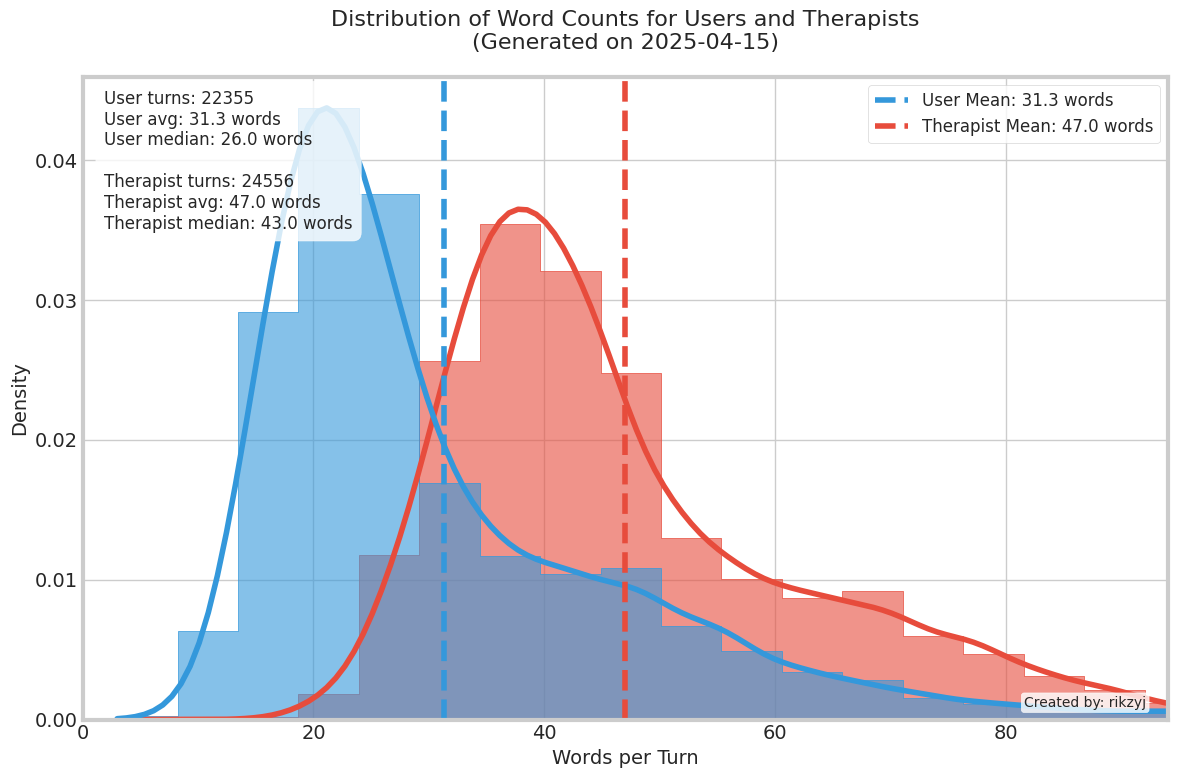

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive')

# Path to your dataset
file_path = "/content/drive/MyDrive/ACADEMICS/FYP/4. Implementation/Datasets/Final Dataset/Psych8k_and_CBT_Conversation_Dataset.json"

# Load the dataset
print("Loading dataset...")
with open(file_path, 'r') as file:
    data = json.load(file)
print(f"Loaded {len(data)} conversations")

# Initialize lists to store data
roles = []       # 'User' or 'Therapist'
word_counts = [] # Number of words in each turn

# Process each conversation
print("Extracting word counts...")
for conversation in data:
    turns = conversation.get('turns', [])

    for turn in turns:
        role = turn.get('role', '').lower()
        content = turn.get('content', '')

        # Normalize role names
        if role in ['user', 'patient']:
            role = 'User'
        elif role == 'therapist':
            role = 'Therapist'
        else:
            continue  # Skip unknown roles

        # Count words in this turn
        word_count = len(content.split())

        # Add to our lists
        roles.append(role)
        word_counts.append(word_count)

# Create DataFrame
df = pd.DataFrame({
    'Role': roles,
    'Word Count': word_counts
})

# Calculate summary statistics
user_mean = df[df['Role'] == 'User']['Word Count'].mean()
therapist_mean = df[df['Role'] == 'Therapist']['Word Count'].mean()
print(f"Average words per turn - User: {user_mean:.1f}, Therapist: {therapist_mean:.1f}")

# Set up the plot
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create histogram with KDE
sns.histplot(
    data=df,
    x='Word Count',
    hue='Role',
    kde=True,
    element="step",
    palette={'User': '#3498db', 'Therapist': '#e74c3c'},
    alpha=0.6,
    bins=30,
    common_norm=False,  # Use different normalizations for user and therapist
    stat="density"      # Show density instead of count for better comparison
)

# Add vertical lines for means
plt.axvline(x=user_mean, color='#3498db', linestyle='--',
           label=f'User Mean: {user_mean:.1f} words')
plt.axvline(x=therapist_mean, color='#e74c3c', linestyle='--',
           label=f'Therapist Mean: {therapist_mean:.1f} words')

# Set title and labels
current_date = "2025-04-15"
current_user = "rikzyj"
plt.title(f'Distribution of Word Counts for Users and Therapists\n(Generated on {current_date})',
          fontsize=16, pad=20)
plt.xlabel('Words per Turn', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Improve legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=12)

# Add statistics annotation
stats_text = (
    f"User turns: {df[df['Role'] == 'User'].shape[0]}\n"
    f"User avg: {user_mean:.1f} words\n"
    f"User median: {df[df['Role'] == 'User']['Word Count'].median():.1f} words\n\n"
    f"Therapist turns: {df[df['Role'] == 'Therapist'].shape[0]}\n"
    f"Therapist avg: {therapist_mean:.1f} words\n"
    f"Therapist median: {df[df['Role'] == 'Therapist']['Word Count'].median():.1f} words"
)

plt.annotate(
    stats_text,
    xy=(0.02, 0.98),
    xycoords='axes fraction',
    va='top',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8)
)

# Add username
plt.annotate(
    f"Created by: {current_user}",
    xy=(0.98, 0.02),
    xycoords='axes fraction',
    ha='right',
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.8)
)

# Set x-axis limit for better focus on the main distribution
x_max = np.percentile(df['Word Count'], 99)  # Exclude extreme outliers
plt.xlim(0, x_max)

# Improve layout
plt.tight_layout()

# Save the figure
plt.savefig("user_therapist_word_count_histogram.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading dataset...
Loaded 11186 conversations
Analyzing conversations...

Table 7.1: Distribution of Single-turn vs. Multi-turn Conversations
          Multi-turn    Single-turn       Total     
Cbt      3,100 (27.7%)       0 (0.0%)  3,100 (27.7%)
Psych8k       0 (0.0%)  8,086 (72.3%)  8,086 (72.3%)
Total    3,100 (27.7%)  8,086 (72.3%)         11,186


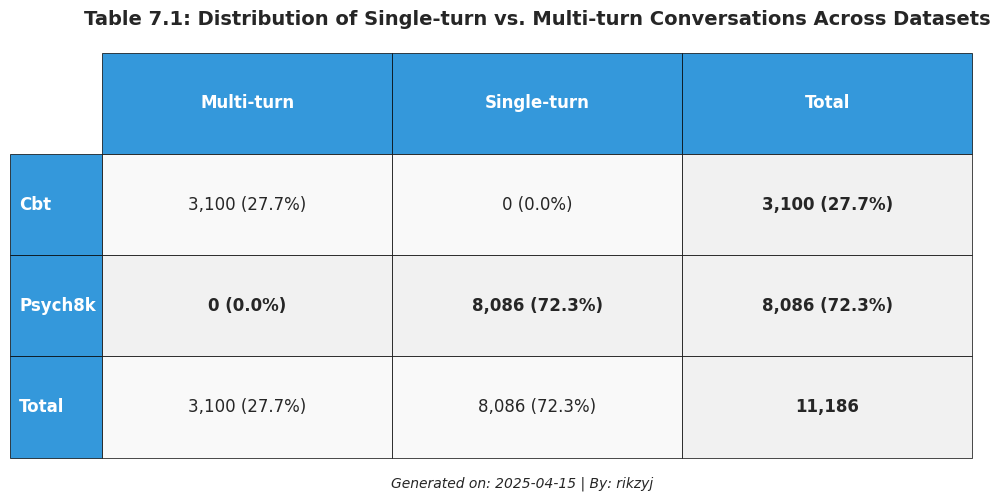


Detailed Statistics:

Average Turn Counts:
Conversation Type  multi-turn  single-turn
Source                                    
cbt                 9.915806       NaN    
psych8k                  NaN       2.0    

Percentage Distribution Within Each Source:
Conversation Type  multi-turn  single-turn
Source                                    
cbt                   100.0         0.0   
psych8k                 0.0       100.0   
Total                  27.7        72.3   

Table saved as CSV file.


In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive')

# Path to your dataset
file_path = "/content/drive/MyDrive/ACADEMICS/FYP/4. Implementation/Datasets/Final Dataset/Psych8k_and_CBT_Conversation_Dataset.json"

# Load the dataset
print("Loading dataset...")
with open(file_path, 'r') as file:
    data = json.load(file)
print(f"Loaded {len(data)} conversations")

# Extract conversation types and sources
conversation_types = []
conversation_sources = []
turn_counts = []

# Process each conversation
print("Analyzing conversations...")
for conversation in data:
    # Get conversation metadata
    conv_type = conversation.get('metadata', {}).get('type', 'unknown')
    source = conversation.get('metadata', {}).get('source', 'unknown')
    turns = conversation.get('turns', [])

    # Add to our lists
    conversation_types.append(conv_type)
    conversation_sources.append(source)
    turn_counts.append(len(turns))

# Create DataFrame
df = pd.DataFrame({
    'Conversation Type': conversation_types,
    'Source': conversation_sources,
    'Turn Count': turn_counts
})

# Create a crosstab table
cross_tab = pd.crosstab(
    df['Source'],
    df['Conversation Type'],
    margins=True,
    margins_name="Total"
)

# Calculate percentages (of total)
percentages = pd.crosstab(
    df['Source'],
    df['Conversation Type'],
    normalize='all',
    margins=True,
    margins_name="Total"
) * 100

# Create formatted table with counts and percentages
formatted_table = pd.DataFrame()

# Loop through each row and column to format the values
for idx in cross_tab.index:
    for col in cross_tab.columns:
        if idx == 'Total' and col == 'Total':
            formatted_table.loc[idx, col] = f"{cross_tab.loc[idx, col]:,}"
        else:
            count = cross_tab.loc[idx, col]
            percentage = percentages.loc[idx, col]
            formatted_table.loc[idx, col] = f"{count:,} ({percentage:.1f}%)"

# Create a cleaner table for display
# Rename columns and indices for better formatting
formatted_table.columns = [col.capitalize() for col in formatted_table.columns]
formatted_table.index = [idx.capitalize() for idx in formatted_table.index]

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')

# Print the formatted table
print("\nTable 7.1: Distribution of Single-turn vs. Multi-turn Conversations")
print(formatted_table)

# Create a more visually appealing table for the report using matplotlib
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('tight')
ax.axis('off')

# Create the table with custom styling
table = ax.table(
    cellText=formatted_table.values,
    colLabels=formatted_table.columns,
    rowLabels=formatted_table.index,
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]
)

# Customize the table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

# Customize header row and column
for key, cell in table.get_celld().items():
    if key[0] == 0 or key[1] == -1:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#3498db')
    elif key[0] == len(formatted_table) - 1 or key[1] == len(formatted_table.columns) - 1:
        cell.set_facecolor('#f1f1f1')
        cell.set_text_props(weight='bold')
    else:
        cell.set_facecolor('#f9f9f9')

# Add title
plt.title(
    "Table 7.1: Distribution of Single-turn vs. Multi-turn Conversations Across Datasets",
    fontsize=14,
    fontweight='bold',
    pad=20
)

# Add footer with current date and username
current_date = "2025-04-15"
current_user = "rikzyj"
plt.figtext(
    0.5, 0.01,
    f"Generated on: {current_date} | By: {current_user}",
    ha="center",
    fontsize=10,
    style='italic'
)

# Save the table
plt.savefig('table_7_1_conversation_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional analysis - Calculate detailed statistics
print("\nDetailed Statistics:")

# Average turn counts
print("\nAverage Turn Counts:")
print(df.groupby(['Source', 'Conversation Type'])['Turn Count'].mean().unstack())

# Calculate percentages within each source
source_percentages = pd.crosstab(
    df['Source'],
    df['Conversation Type'],
    normalize='index',
    margins=True,
    margins_name="Total"
) * 100

print("\nPercentage Distribution Within Each Source:")
print(source_percentages.round(1))

# Export to CSV for use in other applications
formatted_table.to_csv('table_7_1_conversation_distribution.csv')
print("\nTable saved as CSV file.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading dataset...
Loaded 11186 conversations
Extracting features...


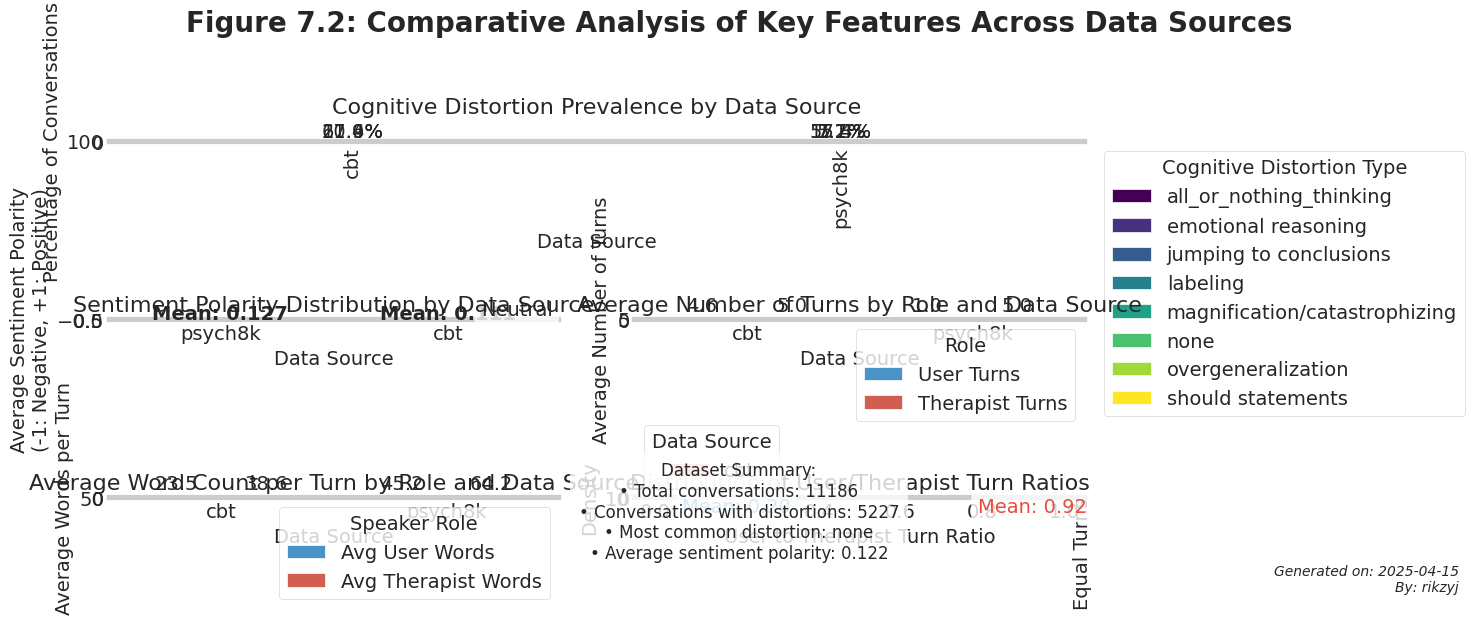


Statistical Summary by Data Source:
        Turn Count              User Turns              Therapist Turns             Avg User Words               Avg Therapist Words               Avg Sentiment Polarity              Cognitive Distortion
           mean    median  std     mean    median  std        mean      median std       mean      median  std           mean        median  std            mean          median  std        <lambda>      
Source                                                                                                                                                                                                     
cbt        9.92     10.0   1.34     4.6      5.0   0.76        5.0        5.0   0.0      23.49      23.0    5.01         38.64        38.45   5.06          0.11           0.11   0.10         38.19       
psych8k    2.00      2.0   0.00     1.0      1.0   0.00        5.0        5.0   0.0      45.17      43.0   18.92         64.18        63.00  15.04 

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textblob import TextBlob
from datetime import datetime
from collections import Counter
import matplotlib.gridspec as gridspec

# Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive')

# Path to your dataset
file_path = "/content/drive/MyDrive/ACADEMICS/FYP/4. Implementation/Datasets/Final Dataset/Psych8k_and_CBT_Conversation_Dataset.json"

# Load the dataset
print("Loading dataset...")
with open(file_path, 'r') as file:
    data = json.load(file)
print(f"Loaded {len(data)} conversations")

# Function to calculate sentiment polarity
def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

# Function to calculate sentiment subjectivity
def get_sentiment_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Function to count words in a text
def count_words(text):
    return len(text.split())

# Initialize lists to store features
sources = []
conversation_types = []
cognitive_distortions = []
turn_counts = []
user_turn_counts = []
therapist_turn_counts = []
avg_user_words = []
avg_therapist_words = []
avg_sentiment_polarities = []
conversation_ids = []

# Process each conversation
print("Extracting features...")
for conv_idx, conversation in enumerate(data):
    # Extract metadata
    source = conversation.get('metadata', {}).get('source', 'unknown')
    conv_type = conversation.get('metadata', {}).get('type', 'unknown')
    distortions = conversation.get('metadata', {}).get('cognitive_distortions', [])
    turns = conversation.get('turns', [])

    # Count turns and words by role
    user_turns = 0
    therapist_turns = 0
    user_words = 0
    therapist_words = 0
    all_polarities = []

    for turn in turns:
        role = turn.get('role', '').lower()
        content = turn.get('content', '')

        # Calculate sentiment
        polarity = get_sentiment_polarity(content)
        all_polarities.append(polarity)

        # Count words by role
        words = count_words(content)

        if role in ['user', 'patient']:
            user_turns += 1
            user_words += words
        elif role == 'therapist':
            therapist_turns += 1
            therapist_words += words

    # Calculate average words per turn by role
    avg_user_words_per_turn = user_words / user_turns if user_turns > 0 else 0
    avg_therapist_words_per_turn = therapist_words / therapist_turns if therapist_turns > 0 else 0

    # Calculate average sentiment
    avg_polarity = sum(all_polarities) / len(all_polarities) if all_polarities else 0

    # Store data for each conversation
    sources.append(source)
    conversation_types.append(conv_type)
    conversation_ids.append(conv_idx)

    # Only store one distortion per conversation for this analysis
    # If multiple distortions, select the first non-none one
    if distortions and distortions[0].lower() != 'none':
        distortion = distortions[0]
    else:
        distortion = 'none'
    cognitive_distortions.append(distortion)

    # Store conversation metrics
    turn_counts.append(len(turns))
    user_turn_counts.append(user_turns)
    therapist_turn_counts.append(therapist_turns)
    avg_user_words.append(avg_user_words_per_turn)
    avg_therapist_words.append(avg_therapist_words_per_turn)
    avg_sentiment_polarities.append(avg_polarity)

# Create DataFrame with features
df = pd.DataFrame({
    'Source': sources,
    'Conversation Type': conversation_types,
    'Cognitive Distortion': cognitive_distortions,
    'Turn Count': turn_counts,
    'User Turns': user_turn_counts,
    'Therapist Turns': therapist_turns,
    'Avg User Words': avg_user_words,
    'Avg Therapist Words': avg_therapist_words,
    'Avg Sentiment Polarity': avg_sentiment_polarities,
    'Conversation ID': conversation_ids
})

# Normalize cognitive distortion categories
def normalize_distortion(distortion):
    distortion = distortion.lower()
    mapping = {
        'allornothingthinking': 'all-or-nothing thinking',
        'blackandwhitethinking': 'all-or-nothing thinking',
        'dichotomousthinking': 'all-or-nothing thinking',
        'all-or-nothing thinking': 'all-or-nothing thinking',
        'overgeneralizing': 'overgeneralization',
        'overgeneralization': 'overgeneralization',
        'mentalfilter': 'mental filter',
        'mental filter': 'mental filter',
        'disqualifyingthepositive': 'disqualifying the positive',
        'disqualifyingpositive': 'disqualifying the positive',
        'disqualifying the positive': 'disqualifying the positive',
        'jumping': 'jumping to conclusions',
        'jumpingtoconclusions': 'jumping to conclusions',
        'jumping to conclusions': 'jumping to conclusions',
        'mindreading': 'mind reading',
        'mind reading': 'mind reading',
        'fortunetelling': 'fortune telling',
        'fortune telling': 'fortune telling',
        'magnification': 'magnification/catastrophizing',
        'catastrophizing': 'magnification/catastrophizing',
        'magnification/catastrophizing': 'magnification/catastrophizing',
        'minimization': 'minimization',
        'emotionalreasoning': 'emotional reasoning',
        'emotional reasoning': 'emotional reasoning',
        'shouldstatements': 'should statements',
        'muststatements': 'should statements',
        'should statements': 'should statements',
        'labeling': 'labeling',
        'mislabeling': 'labeling',
        'personalization': 'personalization',
        'blamingothers': 'blaming others',
        'blaming others': 'blaming others',
        'blame': 'blaming others',
        'none': 'none'
    }

    for key, value in mapping.items():
        if key in distortion:
            return value
    return distortion

df['Normalized Distortion'] = df['Cognitive Distortion'].apply(normalize_distortion)

# Create a figure with subplots for comparative analysis
plt.figure(figsize=(18, 15))
# Set overall style
sns.set_style("whitegrid")
plt.suptitle('Figure 7.2: Comparative Analysis of Key Features Across Data Sources',
             fontsize=20, fontweight='bold', y=0.98)

# Create a complex grid layout for multiple plots
gs = gridspec.GridSpec(3, 6)

# 1. Top Plot: Cognitive Distortion Prevalence across sources
ax1 = plt.subplot(gs[0, :])

# Get top 8 distortions by frequency
distortion_counts = df['Normalized Distortion'].value_counts()
top_distortions = distortion_counts.index[:8].tolist()
if 'none' in top_distortions:
    top_distortions.remove('none')
    top_distortions = top_distortions + ['none']

# Filter the DataFrame for plotting
plot_df = df[df['Normalized Distortion'].isin(top_distortions)]

# Calculate percentage of each distortion by source
dist_by_source = pd.crosstab(
    plot_df['Source'],
    plot_df['Normalized Distortion'],
    normalize='index'
) * 100

# Plot the stacked bar chart
dist_by_source.plot(
    kind='bar',
    stacked=True,
    ax=ax1,
    colormap='viridis',
    figsize=(15, 6)
)

ax1.set_title('Cognitive Distortion Prevalence by Data Source', fontsize=16, pad=20)
ax1.set_xlabel('Data Source', fontsize=14)
ax1.set_ylabel('Percentage of Conversations', fontsize=14)
ax1.legend(title='Cognitive Distortion Type', bbox_to_anchor=(1.01, 1), loc='upper left')
ax1.set_ylim(0, 100)

for container in ax1.containers:
    # Only add labels for segments > 5%
    ax1.bar_label(container, labels=[f'{v:.1f}%' if v > 5 else '' for v in container.datavalues])

# 2. Middle-Left Plot: Sentiment Profiles
ax2 = plt.subplot(gs[1, :3])

# Create violin plots for sentiment polarity distribution
sns.violinplot(
    x='Source',
    y='Avg Sentiment Polarity',
    data=df,
    inner='quartile',
    palette='Set2',
    ax=ax2
)

# Add box plots on top for more quantitative view
sns.boxplot(
    x='Source',
    y='Avg Sentiment Polarity',
    data=df,
    width=0.2,
    color='white',
    showfliers=False,
    ax=ax2
)

ax2.set_title('Sentiment Polarity Distribution by Data Source', fontsize=16)
ax2.set_xlabel('Data Source', fontsize=14)
ax2.set_ylabel('Average Sentiment Polarity\n(-1: Negative, +1: Positive)', fontsize=14)

# Add mean lines and values
for i, source in enumerate(df['Source'].unique()):
    mean_val = df[df['Source'] == source]['Avg Sentiment Polarity'].mean()
    ax2.hlines(y=mean_val, xmin=i-0.3, xmax=i+0.3, colors='red', linestyles='dashed', linewidth=2)
    ax2.text(i, mean_val+0.03, f'Mean: {mean_val:.3f}', ha='center', fontweight='bold')

# Add reference line for neutral sentiment
ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
ax2.text(ax2.get_xlim()[1] * 0.98, 0.02, 'Neutral', ha='right', va='bottom',
         bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))

# 3. Middle-Right Plot: Turn Counts
ax3 = plt.subplot(gs[1, 3:])

# Calculate average turn counts by role and source
turn_summary = df.groupby('Source')[['User Turns', 'Therapist Turns']].mean().reset_index()

# Reshape the data for grouped bar charts
turn_summary_melted = pd.melt(
    turn_summary,
    id_vars=['Source'],
    value_vars=['User Turns', 'Therapist Turns'],
    var_name='Role',
    value_name='Average Turns'
)

# Create the bar chart
sns.barplot(
    x='Source',
    y='Average Turns',
    hue='Role',
    data=turn_summary_melted,
    palette=['#3498db', '#e74c3c'],
    ax=ax3
)

# Add value labels on top of bars
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f', padding=3)

ax3.set_title('Average Number of Turns by Role and Data Source', fontsize=16)
ax3.set_xlabel('Data Source', fontsize=14)
ax3.set_ylabel('Average Number of Turns', fontsize=14)
ax3.legend(title='Role')

# 4. Bottom-Left Plot: Word Counts
ax4 = plt.subplot(gs[2, :3])

# Calculate average word counts by role and source
word_summary = df.groupby('Source')[['Avg User Words', 'Avg Therapist Words']].mean().reset_index()

# Reshape the data for grouped bar charts
word_summary_melted = pd.melt(
    word_summary,
    id_vars=['Source'],
    value_vars=['Avg User Words', 'Avg Therapist Words'],
    var_name='Role',
    value_name='Average Words per Turn'
)

# Create the bar chart
sns.barplot(
    x='Source',
    y='Average Words per Turn',
    hue='Role',
    data=word_summary_melted,
    palette=['#3498db', '#e74c3c'],
    ax=ax4
)

# Add value labels on top of bars
for container in ax4.containers:
    ax4.bar_label(container, fmt='%.1f', padding=3)

ax4.set_title('Average Word Count per Turn by Role and Data Source', fontsize=16)
ax4.set_xlabel('Data Source', fontsize=14)
ax4.set_ylabel('Average Words per Turn', fontsize=14)
ax4.legend(title='Speaker Role')

# 5. Bottom-Right Plot: Turn Ratios (User/Therapist)
ax5 = plt.subplot(gs[2, 3:])

# Calculate turn ratio
df['Turn Ratio'] = df['User Turns'] / df['Therapist Turns']

# Create histograms of turn ratios by source
for source, color in zip(df['Source'].unique(), ['#3498db', '#e74c3c']):
    source_data = df[df['Source'] == source]['Turn Ratio'].dropna()
    # Remove extreme outliers for better visualization
    source_data = source_data[source_data < source_data.quantile(0.99)]

    sns.histplot(
        source_data,
        kde=True,
        stat='density',
        alpha=0.5,
        color=color,
        label=source,
        ax=ax5
    )

# Add a line at ratio = 1 (equal number of turns)
ax5.axvline(x=1, color='black', linestyle='--')
ax5.text(1.02, ax5.get_ylim()[1]*0.9, 'Equal Turns', rotation=90, va='top')

# Add means
for source, color in zip(df['Source'].unique(), ['#3498db', '#e74c3c']):
    mean_ratio = df[df['Source'] == source]['Turn Ratio'].mean()
    ax5.axvline(x=mean_ratio, color=color, linestyle='-.')
    ax5.text(mean_ratio, ax5.get_ylim()[1]*0.8, f'Mean: {mean_ratio:.2f}',
             color=color, ha='center', va='top',
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))

ax5.set_title('Distribution of User/Therapist Turn Ratios', fontsize=16)
ax5.set_xlabel('User-to-Therapist Turn Ratio', fontsize=14)
ax5.set_ylabel('Density', fontsize=14)
ax5.legend(title='Data Source')

# Add summary statistics as a text box
summary_stats = (
    f"Dataset Summary:\n"
    f"• Total conversations: {len(df)}\n"
    f"• Conversations with distortions: {(df['Normalized Distortion'] != 'none').sum()}\n"
    f"• Most common distortion: {df['Normalized Distortion'].value_counts().index[0]}\n"
    f"• Average sentiment polarity: {df['Avg Sentiment Polarity'].mean():.3f}\n"
)

plt.figtext(
    0.5, 0.03,
    summary_stats,
    ha="center",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8)
)

# Add current date and username
current_date = "2025-04-15"
current_user = "rikzyj"
plt.figtext(
    0.98, 0.01,
    f"Generated on: {current_date}\nBy: {current_user}",
    ha="right",
    fontsize=10,
    style='italic',
    bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8)
)

# Adjust layout and save figure
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig('figure_7_2_comparative_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Print additional statistical insights
print("\nStatistical Summary by Data Source:")
source_stats = df.groupby('Source').agg({
    'Turn Count': ['mean', 'median', 'std'],
    'User Turns': ['mean', 'median', 'std'],
    'Therapist Turns': ['mean', 'median', 'std'],
    'Avg User Words': ['mean', 'median', 'std'],
    'Avg Therapist Words': ['mean', 'median', 'std'],
    'Avg Sentiment Polarity': ['mean', 'median', 'std'],
    'Cognitive Distortion': lambda x: (x != 'none').sum() / len(x) * 100  # % with distortions
}).round(2)

print(source_stats)

print("\nTop Cognitive Distortions by Source:")
for source in df['Source'].unique():
    print(f"\n{source.upper()}:")
    distortion_counts = df[df['Source'] == source]['Normalized Distortion'].value_counts().head(5)
    total = len(df[df['Source'] == source])
    for distortion, count in distortion_counts.items():
        print(f"  {distortion}: {count} ({count/total*100:.1f}%)")